# Live Hard Coral Cover by Region
Live hard coral cover as fraction of benthos in each GCRMN region. Based on visualization from GCRMN 2021 report.  
[Sister set of visualizations for algae cover](algae-cover.ipynb).

_Author: Peter Kerins_  
_Created: 16 Apr 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Time series
- Line for value
- Multiple, overlapping area marks for confidence intervals
- Different mark groups for modeled vs observational epochs

## Data
Time series data from GCRMN 2021 report.  
Carto: [ocn_dash_02_gcrmn_lhcc_ac](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_dash_02_gcrmn_lhcc_ac)  
Table includes synthetic data points to assist in drawing lines & areas without gaps.  

# Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Specifications
The 'structure' of the time series data was not the same for all regions. A separate visualization was created for each region, but these generally fell into groupings within which the specifications were very similar.  

## Type: AB
Regions where the times series data follow a simple AB format (modeled, then observed). The only important difference between specifications was `region_name`.  

### [Australia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAQVYsDwtjsjEwaPxh0pm0g1LerHUdgRZVsqHlF3Z8E02jl+gAyrkiQBadjoWDISzW-knVr+sAAVTFBjA3hsYEIrDsOpk1DAynQeHQYB9fssshF4qlMvh3MWF1YhDTYTe73wRBI5Fcmk96lcdHg5kabe4qFI6EIjEoBT4AEc7AB+YcAXldAFEDDP-gAVMAAKjAADExQB5CVgbjwGQItOwRAI1IFBHUR2oQ92RDweAI9DwMAAdW+M7FM7AjX78EnACkBQAOzfP8-xAcBYCqjyAAiYBXuoN4InSYCTpC0LvJB7ywsWh7Uph2GQPqSgALqLGy6aYDg5KGpiUCmvod4PnaxrmnYHSQISrz6OxVrmEy8ylsaMZIemZwPEsvQ0lIJb0VkhDqNwfTqD0bxKa40TCRc1p+px3TIOYbyVsgWBYQAmu88z0QaCpaugMiwKJto0aRJEQORBLtqsJK0ZsRpZIxUBXAg9jtNpUl9G8OjMhFbLduMejrJRGZvMx8DDJAvjIHYyhvAZRm2RctjJjS8SJHF0yVMmNT6sJAUMfy+Whaswz0fFGAhEkpIZGAqR0AAbORYDtTIjCBEkWoqvII2siV1A0jkeRDO5YCeXUVxqN1FLtTYjDHG87DcAQ3asVkLU0iF3nhe1djoOwOXrsqJ6Teo023fdOVbs4d2EK9Kp1TtrJ7QdTHIN4QxxRdzXXWdSzMK1+gAArhIEYwLXuQoPaEiDjY4zhw1lNgYLcUAAcROJkRRGDqAA1r5QN2dJbzUEp5aE94Skues8lQN4z7IKTDVUk1+h+poagIulbWScalbUVA0szbzWSs9w5bsN0LPXoedIU5JuI4nF8vbbLwvGkFkDpQiqC7HDjzq+oE1i+E+2wFL94ZRFFz2Y5zmm7L-kq0zUUDIwdgnDLgcXNcinRdwABC3DcKsDkABQAISVqwqB0Civrmv6ACU+vR4bklubL5ceXFNP0wHDzm1kPSh1A5iGfbIlc5xJtMZ7Nt20VkmQNs1h7HcwdZOWJkSdHWRXJx0P6FdYWZdluX5YZpxD9HkBa3cXGw-o3TQzNWX7RvTHcK44QIgAnKIQmT8a3QFIvR9QCfsNn+veW8YQKl76Px3oHc+iZOJKhVG8AAxKIOB8Cn5zxEuHOwW4yjwGYPvZKkC1j9QAIwAGYQGyy6MnCOWhZ5IKgNxDi+hgDLFWGZL4QRfgWBBECBwoJwjvBmu8MUeF3hYGzrnRCyE6S8PMlvQRMVkDrmJumNOwi6AFXUPICy7wi68K4eoQRzkFFKJwWougBQAIaN4QADlSABdhPg-Cj2QLo+ReBFHphznQOw19b6WJXHg9IRi8HeA0ZhQAyAQ4T0c4pR5ZAHeN8Rkd4dAAlBKwjwyED9rGAlsf4QIjixIRNcbnDxN91BAJ8X4+JiSi4hLCU4lxeA3FRNvg-UpcSEmBMqck3hEpBaIF2II2pbj86wELpYMckIukOUxnudg4tIhckclCHA7wJS7Byv6DRcxS5z2rgbb2CoekEwnlQvmKCIH2CgfoaB7B2ADQGgQghiCqFgNQegzBpzlS4LoKIbZDxvmbF+cQnmu8W40nbpgXZWROanQPr3RW-dbZ5QBVsHY49AVz0gNPdMawm4KgXgfJewVT7HJyn-T+W8HlIL3u-Vex9CXn2JWlTxxTLHkrRa-KliNP60t-maABXjUgst3r4cBB8cEwPgQgxFCohXPOfK8kVZyPlEPBXZMhOg-qHKOdQj0PEoD0IRqZT4xgWF-HYdqdhzgUl8IEUI-JDAdYoRoBIqRWAZFyNyf03OKi1EAUspoyE2ickkw9XQQx8STFmMhJY9JshfBZIcVgcJwbCl8uaf4tpVToSJsibyplqRU3lPTR01Joho2ZPsYG-Rtrk3FKabEtNSTQmZpqdmwBtaymtKSaYzp3TelYGDYM4ZYBRlLMMhCQUUyZnpl0LABZYyVmrGUOszZZdn6SqyPs8IlDBUnPle8mBVybl3IFaA6VaDZVqV3ecvqdBgK-MpiuquuzsVdGZkxEIN1BXd2hVRNKcLB7KpHsirFz90UVkxVu0BuLkr4sgCvVqP8L4kr3mStdL92U0i-qvBD9L9CitQ+dLU3BaZYsVAqsV4rgHKp9qqihGqjlcW1bQ3VDCDXMLAKwgEHDzXcN4fw+kMhBFKNEbrR1kJJHmGkYwFEbqg1KK9eov17wA0Jubba0NxjTGKajTY2N5aVPuqUdWhEMT20VIzVm21DTc35o7e0rtxbS26YCPGizdSCmMpKXWgtDbqkGcszmzzpnC32ZHSwXt-bDJDLhCMsZo7JncGmeEWZ07Z1LPnWsouGzn5YlXVR3AThN14sI8Rt5V7ICXOubc+5cw714l5tsyufz6rtWBSzNmf04qQu5ubLKAshYmlFtQ12kslYqB-X3FiZ81YaywZAYTDrqjbJASlBWflG7BwG8yCbj4EtaQ29Ic0zshsS3dkrDbvsnLE26p0VrYcI6brPrHU4+hGhJxTqOiLBdoslzmI1n59F1oKjrgzM253X1tzhGCjbXWe7jdhQ+BEu3j0xyAxB1kGKqx0bRVBzoMG4PhSJZfUlhU8tZCwbjj+e8uWIYZUUoByPh5srxZTzD8HCdIas-T-DxzhXYLIxc+Aog8HsHMZgbnTyz0YIvXzvdOB+oFHF40FOaq0egJoW8PVKxWNGvYyawEZqA28etUJ+14ixPOtdaptzyit7et9VogrOj9OybUwqox4atNWJ03Y5zFa8nW6MyZlpZn3iNtc-UgLQf612ctWk73ca-dJo8224Phaw9W4j620QNmQ8ha6WFxdfalEDui0O2LEzx27aS1O2QM6wCLOWaoBdS7st1aQah7IjvVesmlaVmkFXD3VdJzzmVUvyekdl9er5q7g7-KfWD1ukBQWdwhV+5KMKrb9yR5KwDY9gMUox-vx5OPD7UoJd-dnm8Set8pczs-VOL90qJ1bDzzLxdM+gyz6nOGoCc7f8Pp5PvGBQXYXUXBnHvFBSXOVGXK9fqJVG-JXchdVVFejdXOhFjJhHXDjU1YEQ3SEPjXQQTW1ebM3d4cTJ3S3Pza3eTH1CNJTR3RPAxN3MNTTCxL3DJJzbJZ3StAPV-PNLzWzczDPXOP-fgoLTtWPEtePPTcPdzOnFPaPIQqgzPRpbPAQ3PS1fPHpQvT7KLUMYdcZMdIUKvCIGveZevOdJvDLLLI5WrLEPLTvA5FAtFXvS9fvA9KrcAqVSAl5aXToUVOXG9OwtvQOOfXmZ9W7RWd9FfPmNfToDfa2bfADUeFZbvNiMDTHZw3eE-PHb-Z-FRLwi4cfGDVnAnJ-JDPDAAzUJSErNw4AoXEXMXAAxAlXLHClNA5jfVTAn4PXLjPAq1fjIg63Eg0TMgi3KTWRYQm3cwO3Og5TWQkNZgjTOg7TDgn3LghYwPMQ1PHzJtZQkQyPbYxQotd4OPNYhPbg-3NxIzBQ7zdpdPfYugTnW4wQk4rQ8LYvSLQdAwuLSvRLUwuZOvBvdLRdTLZdUI3LEDDdZ7aDYrEjAIqAAfTwmrWferAHVaNyOYIAA)

### [Brazil](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAIVsLUYdkgaPxh0pm0g1LerHUdgRZVsqHlF3Z8E02jl+gAyrkiQBadjoWDISyW-knVq+sAAVTFBjA3hsYEIrDsdiqYGU6Dw6DAXp9llkIvFUpl8O5iwurEIybCb3e+CIJHIrk07vUrjo8HMjWb3FQpHQhEYlAKfAAjnYAPwDgC8zoAogZJ-8ACpgABUYAAYmKAPISsDceAyBHJ2CIBGpAoI6j21B7uyIeDwBHoeBgADq30nYsnYEaPfgY4ApAUAHZvn+f5-wAsAAEEeQAETAc91EvBE6TAMdIWhd4wPeWECz3al0MwnUcSUABdRY2RTTAcHJfVMSgY19GvW8bUNU1tTuSBCVefRWItcwmXmItDSjBCUzOB4ll6GkpELWiskIdRuD6dQejeBTXGiQSLktH0OkgbpkHMN4y2QLAMIATXeeZaL1BU8FsGRYGE60qOI3USLIhB7DUJJqM2A0snoqArk81ZmKyHo+jeHRmU0lQO3GPR1nI1M3kY+BhkgXxkDsZQ3n0wybIuezqBpeJEliyBpkqGRqhwVJdUE-y6P5PKQvaeQwFotl4pCHyMjAVI6AANlIzrWRkRhAiSOyVQ6rrippHI8iGNyIFI2J0CubyqIpLqbEYY43nYbgCA7MKoDat5gpbUKKrsdB2GyldlUPab1Fmrr7seux12ce7CDelUGt21l9sOhjkG8IYKsu-RukuirllC-QAAVwkCMYSu3IVHtCRBJscZxzsymwMFuKBf0IzZcXWrIMHUABrElfIgJqukkt5qAUktie8BTnPWWSoG8B9kHJpqqRa-QfU0NQETS4YhayMtKKgBW5vEw0ue4Et2G6TmLz3OkqYeXEcQqlWfKFiXDUCyA0oRVBdnOx4dfUKbpfCA7YHlm90tii47PQBynKtzWaPD2yOYGLUTkVyOLmueSou4VVuG4VZg4ACgAQjLVhUDoFFvVNX0AEoTfDs3xNczXq7Wir6aZsPxJt8Lo6gcwDJdoT+d0y2GL9x3ncK8TIG2aw9juJWWNLFM1jbhUrl02GgoR4WDpyvKDNOUfI70lebppeGj4yrKt4Y7hXHCBEAE5RAEmeLm6ApD681rT46zLN9y7jCCUu+D897h2-vGXSSoVRvAAMSiFgXAx+CchJah+mUeAzB9bsQgWsQaABGAAzMAzWXR052B0ADaeiDHhui4lAYASMTKfGMEEX4FgQRAgcKCcI7wOrvDFDhd4WB86F3gohOkPCzI7wEdFZAK5SYpizkIug+V1DyHMu8MuPDOHqAEU5eRiisGqLoAUX86ieEAA5Ui-jYT4PwE9kA6LkXgBRKYC50DsFfG+FjFw4PSIYnB3h1HoUAMgEWFdFOMUSWABXifEZHeHQfxgSMLcMhPfKxgIbH+ECA4kS4SXGF3cdfdQgDvG+LiQksuwTQmOOcXgVxkSb73xKbE+JASKlJJ4RKMWiBdgCJqa44usBS6WGHJCTpwdsbbnYDLSIXIHJQhwO8CUuxsq+nUXMSukd67iUIQqbpRMKGUNAWxJKWDoHsHYENIaeC8EIMOb4eM65UHoPAfYSBdU6CiC2abGeXy8QB0FvvCKNIu6YH+VkPmZ12IDzVkPJ2uUdlbB2FPAFCdIAlmMmJRBkBl7sVXti9e39sq-ygMo25WKMFJTxSfd+X9z7Evth4opFiyWopfm-ZGJKCV0pNP-TxqQWX73ucczopz9AwLgbAgVIChWPIfM8zBrzsF0AIWC2yJCyGYsOZxY5kA6HMFWKZL4zC-hsNsBwpwXCeF8PpDIARiiRFGxoOIyRWBpGyJyX0wuyjVG-gshoyEWjslk09XQAxcTjGmMhBYtJshfCZPsVgMJIaCl8qaX41plToRJoibyplqQ01lIze0lJogY0ZLsUGvReS3GMuKTE9NiSQlZuqTmgBjT62FsSSYjpXSelYBDQMoZYARmLIMhCQUkzpkpl0LAeZozlmrGUGsjZVcn5-LXdkC1pwDlYqFS85UNIoHnMudcqVRCZVPJUgqg9NQ6AAV+URTZQsdmL3ZpFBiIR2oz0yn3KFFFUqwpHqq8eSKF4bvRfPTV+8cWUtPvoa6NKN5Eu3gVVVz92XHy5T-N4pyEUKlgHZbgDMF6KkVdAiVkq8OB3VVoKDqLtVvD1SsBhRqwAsIBOwthzhkm8P4YI6tDqkJOshBI8wUjGAondcGxR3q1H+veIGxNLbq1hqMSY+T0brFxorUpj1iiU15oLS0xtVS9PVvqYZjtxm2ndpLWW7TAQE3ZurQZutpTrOZuc7UwuFm3PNPKfhHjnSWB9oHQZQZcJhmjLHRM7gUzwgzJnXOxZC7Vll3WWurEa6qO4C3SvQjxH91vKgEei5VyblzAfXiZ9tFa7U0al1IFnNuYAwqhCgWNtMqi3FkaKWF0vZy3Viof9g8mJf21rrClkBBPGy2cA5KqsWbnFfXbB2cWNLfukKaD2-XZY+3Vt+oOIdSY+U6E1mOpDwgZSTtupYqcSFjrCyXSLFc5h1e+Q8WmCom7M2todjukAQU93Bb+pK0L7ZD3W2ew0E9ll0dZBB8sO7UUwc6HihDt0kMXxJTvaHrIKVo7g5yz+WP6WufvnjhUbLcVE70lh5Df821ALQ0gsB17iuQCgfAUQOD2BmMwDl8FyDZVoKvScsj7yCiC7uxnDVyOsUMf0Exg1jCfgmsBGarjlrITWt0HagThshPUGdWJ11EmZHKe80onePq-WaK3ZW3JVvVMRo05YrTtjHOO+TbW6J7mAvvCbV5upuaER+-80W2z7xUke-jd7-Ttb23+6LUHy3IemdGYD1H4L3Sl39sUYOyLw7ovjInethL07ZCzrAAspZqhF3Lsy9VxBOXN37JRbu5BRXD3HvK5Ti4F65Vi5FRLgaHyqtZafXXf5r7zudzhKC797X+4jZhbeBEUO8MgcnmBrFiPd+HNRxxWnGP2qk5Q7vFnWQCfH-fnDen2OGWFLD-y6XelX407v8TxDhLH++eZW-nuuzoetzrzvzv3qzigkPjfqKmPiqk3sQrLrRvLvRtQjqsrixkwmxurpxoGlanxvaobmIiJi6m6mnl6jbnJvbtxrptJipoqoYq7uYu7ukg5lkrQVWlbq5uHg2m0qnmZlbv-vmlZlnjxjHqwZ7uwcHvkonqIJninqZnQYIaHknhHl2kFr2nnk9hFsGCOmMuOkKOXhEJXnMjXvOvXmlhlpQs3gnK3nsldigeel3sAWcmVqeoAcLpejAaPoNPetlj8s+jPv9u+mrJ+sDsLKDp0ODmtlMpTtvnDo4QqPvvDmPEfujg-vSqSm-jflShkThmRm-gRgpIVi4WKqAXzgLlfjLqQsgR3lqmgYxvQoalgexqasCHgTrgQQbghI6sbiQabmQQIa4rJr6pGgpg7hwU7q4i7upswfZpIU5uQTWs-jwZ2nwYoZwenqmiIZHmIaWrHjptIcsQ0nITsSZs2kMT5ioaccnuoT2iFloQXuFkOnoTFmXvFsYbMtXrXqlkuuliunXNlizm3g4ZSgViRrAZzr3u4VVr8lsu9jYa5HMEAA)

### [East Asia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAUXQsDwYAAgs1MGj8YdKZtINS3qx1HYEWVbKh5Rd2fBNNo5foAMq5IkAWnYGuQlht-JOrX9YAAqmKDGBvDYwIRWHY7FUwMp0Hh0GBfbBQ7IReKpTL4dzFhdWIRU2E3u98EQSORXJovepXHR4OZGq3uKhSOhCIxKAU+ABHOwAfiHAF43aqDKr-gAVMAAKjAADExQB5CVgbjwGQI1OwRAI1IFBHUJ2ofd2RDweAI9DwMAAdW+qrFqrAjT78AnAFICgAdm+f5-gAwCdR5AARMAL3UK8ETpMAJ0haF3nA95YSLfdqTQjDIANJQAF1FjZNNMBwckjUxKAzX0G873tE0LTsDpIEJV59BY61zCZeYSxNGN4LTM4HiWXoaSkYsaKyQh1G4Pp1B6N55NcaIBIuG1szY7pkHMN4K2QLB0IATXeeYaMNBU8FsGRYCEu1KKIwiIBIgk21WEkqM2Y0sjoqArgQex2g08S+jeHRmVCtku3GPR1jI9M3gY+BhkgXxkDsZQ3l0-SrIuWzqBpeJEmi6ZKhkaocFSA0BN82j+RyoLVmGGiYowEIklJDIwFSOgADYSLANqZEYQIkhslV5GG1lCppHI8iGFywDcuorjULqKTamxGGON52G4AguyYrJmppQKPJCtq7HQdhMtXZUjwm9Qpuu27Mo3ZwbsIZ6VVqrbWR2vb6OQbwhmis6msuk6lmYFr9AABXCQIxiKnchTu0JEDGxxnBh9KbAwW4oD-AicWI0iMHUABrLyAesiS3moeSy3x7x5Mc9YZKgbxH2QYn6qpRr9GzTQ1ARFLWrEk0KwoqBJem7msmZ7gy3Ybomcvfc6TJsTcRxaLZc26XBZNfzIBShFUF2GHHlV9RxpF8JdtgCXb1S0KLhs9A7Ic43pZ8pWGfCgZGDsE4pYDi5rjkiLuAAIW4bhVh9gAKABCCtWFQOgUQ1C1-QASl1qP9bE5zpbL1zoqp2n-YeU2sh6EOoHMPTbcEjm2KN+j3atm38rEyBtmsPY7iDrIy0M0So6yK42Mh-QLuCtKMqynK9NOQeo8gDW7nY6H9G6SHpvS3b1-o7hXHCBEAE5RH4ieTW6AoF8PqBj+h0+1+yrjCEUu+D9t4BzPomNiSoVRvAAMSiFgXAx+s9BJhzsBuMo8BmB7wShAtYfUACMABmYB0suhJ3DloGeiCoAcVYvoYAyxVjGS+EEX4FgQRAgcKCcI7xprvDFNhd4WAs45zgghOkPCTKbwEZFZAq5CZplTkIuguV1DyFMu8QuPDOHqAEQ5eRijsGqLoAUP86ieEAA5Uh-jYT4PwI9kA6LkXgBRaZs50DsFfG+Fily4PSIY3B3h1FoUAMgEmFdFOMUWWABXifEZHeHQfxgT0LcMhPfKxgIbH+ECA44S4SXE53cdfdQgDvG+LiQkwuwTQmOOcXgVxkSb73xKbE+JASKlJJ4RKfmiBdgCJqa4vOsAC6WFHJCTpPt0Y7nYKLSIXI7JQhwO8CUuxMr+nUXMEus8q5609gqbpeNx6UJ5sg8B9hIH6Cgewdg-V+r4PwQgyhoCUFoIwSc5UOC6CiC2Q8L5mwflEK5jvZuNI26YB2Vkdmx19493ln3a22V-lbB2GPAFs9IBTzTGsRuCp5770XgFE+RzMq-w-pve5iDd5vxXkfAlZ8iXJQ8UUixZLUUv0pfDD+NKf7mn-p41IzKd6+DAfvbB0C4HwIRQqQVTzHwvOFac95hCwXWVIToH6BzDlUM9JxKAdC4ZGU+MYZhfw2G2A4U4LhPC+H0hkAIxRIjtY0HEZIrA0jZE5L6TnZRqi-xmQ0ZCLR2SiYeroAYuJxjTGQgsWk2QvhMn2KwGE4NBTeVNL8a0yp0JE0RJ5Yy1IqaynpvaSk0Q0aMl2MDXovJbiGXFJiWmxJITM3VOzQAxpdaC2JJMR0rpPSsDBoGUMsAIzFl6QhIKSZ0y0y6FgPM0ZyzVjKDWRs0uT8JVZD2eEChArjlyredAy51zbn8pAVK1BMrlK7rOb1OggEfnkxXZXHZWKuiM3oiEK6Aqu5QvIslWFA8lXDyRZip+aLywYq3SAnFCU8WQGXi1b+59iW71JWu5+bKaSfxXghul+gRWodOjZbg1NMWKnlaKsVQClVexVeQ9Vhz2JapoTq+h+qmFgBYQCdhbDnDJN4fwwRVb7WIUdZCCR5gpGMBRG6oNiivVqL9e8ANCbm1VtDUYkxCmo3WNjeW5T7rFHJtzfmlpDaqn6arfUoz7aTNtK7cW0tOmAjxqzVWwztbSk2YzS52pOdLPueaeUvCvHOksF7f2vSgy4TDNGaOiZ3ApnhBmdO2diz52rMLusp+WJV1UdwOa04uLCPEdeVeyAFyrk3LuXMO9eJuZbIrr8uqbUgVMxZj9aKELOam3SnzAWpphZUOduLBWKgf290YqfFWatMGQCEzrLZwDEpy28g3IO-XmTjfvPF9Sa3pAWkdoNsWrsFZre9r7QmXVOgtdDuHTdp8Y4FaWAnUho7wv5yi8XOYDXvk0VWgqWudMTandfa3OEoK1ude7mNmFd4ETbePdHIDEHWTosrHR1FUHOgwbgyFQlF8SV5Vy1kTBWP36705Yh+lhTAEI6Hqy3FZPMPwbx0hvz99aesilSVmkUD4CiFwewMxmB8NHMTGe9BF6sFkeqkYkXJDk6quRyA6hbxdUrFY4a9jxrASmu4xayEVrdC2sE1rYT1AnXiZdZJmRKmfNKM3t631mj8sVtyXbtT4bNOWO07Ypzruk01uiR5wL7xG3ebqTmhEQeAuFrs+8VJPu43+4MzWttwfC1h9txH1tohjMh7jyF7pi6+2KIHVFodMXxnju24lqdsgZ1gAWUs1QC6l1Zdq4g1D2R8tK85zuqXe7zkHsqxzyVyDxeyoH1evqnzV1Bz+U+4HLdIAgo7uCr9CVoUWz7vDiVgHR7AfJajw-DzMcHypfir+LON6E-bxShnF-ydX9pfji2ge+Vy-p9BxnFOcNQD80ynLlzpejznzgLkLqPhcKes8pLp0CKjLoqnfo0ArrRiivRirrQixowprhxiasCAGpavxnaqbmIqJs6q6lnp6g7vJs7jxnpjJqpvKoYp7uYt7uko5lkvQZWnbm5tHvWm0pnuZnbgAXmtZvnrxgnuwb7pweHvkqnrnmIRnmZgwcIZHmnjHp2sFj2sXm9pFqGMOmMmOkKDXhEHXnMo3nOi3ulplocjVliLlt3vsmgaisAVPjzsPkekAePjASTqRoPterenPg+tstzM+tdvLO+mvjzBvp0FvpbLvgBiPMsr3sxGBmjs4TvGftjr-q-sopAWhg-uyk-lhtfrhmRnLpqPJMViAdAmAYLsLkTk9igWqhkaihgcxnqtgT8NrlxgQQbkQSbvBA6ubmQZbhQUIa4nJj6hGopi7lwW7q4h7hpqwQ5tIc5pQdWtTnwR2gIcodwdnimooZoTwpITGmscnq5vIXnkoU2hMb5moQoenscTFqFjoaXhFoOgYbFtXglqYbMg3k3mlouhlsugHHYXiA4Ruo9ljkViRvAVAOVoelVjVn8r9stM5HMEAA)

### [Pacific](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkABXQ8EYvngkDR+MOlM2kGpb1Y6jsCLKtlQ8ou7Pgmm0cv0AGVckSALTsdCwZCWK38k6tP1gACqYoMYG8NjAhFYdjsVTAynQeHQYG9vssshF4qlMvh3MWF1YhBTYTe73wRBI5Fcmg96lcdHg5kaLe4qFI6EIjEoBT4AEc7AB+QcAXhdAFEDFP-gAVMAAKjAADExQB5CVgbjwGQIlOwRAI1IFBHUB2ofd2RDweAIjVgADq3ynYqnYEavfg44ApAUAHZvn+f5-wAsAAEEeQAETAC91CvBE6TAcdIWhd4wPeWFC33al0Mw3UcSUABdRY2VTTAcHJA1MSgE19BvO9bSNM07A6SBCVefRWMtcwmXmYsjWjBDUzOB4ll6GkpCLWiskIdRuD6dQejeBTXGiQSLitX12O6ZBzDectkCwDCAE13nmWj9QVPBbBkWBhJtKjiL1EiyIQew1CSajNkNLJ6KgK4PNWZish6Po3h0ZlNJUTtxj0dZyLTN5GJ1eQoF8ZA7GUN49IM6yLjs6gaXiRIYsgaZKhkaocFSPVBL8uj+Vy4L2nS2i2TikJvIyMBUjoAA2UiwA6mRGECJJbJVdrWSKmkcjyIZXIgUjYnQK4vKoikOpsRhjjedhuAITtQqgVq3iC1sQvKux0HYLLV2VI9JvUaaOtu+67A3ZxbsIF6VXq7bWV2-aGOQbwhnK879G6c7yuWEL9FVcJAjGYqdyFe7QkQcbHGcU7IEc0T9F-QjNlxVasgwdQAGsSR8iBGq6SS3moBTSwJ7wFKc9ZZIyjVkFuXnxKNAKOPCPbYARVLhj5rJy0oqAZZmkWoDZ7hS3YbpWcvfc6TJh5cRxcqFe8vnGqpZqGNve9UF2U7Hg19QJv0X1NDUaWbYdo1bPQezHLN1XfLlmyWYGRg7BOWWg4ua55Mi7gACFuG4VY-YACgAQnLVhUDoFEfTNP0AEoDdVo3xJckWK5W8rqbpwPxItn2w6gcx9O9rIuZOu4ksVyBUoRO2coK8TIG2aw9juEOslLIyxJjwL2OhwK4Yyvbsty-TTlHoPIG13uV-3tfCY3nKGO4VxwgRABOUQBJno1ugKZerppWG3+GU+svPqBSyU2+99d6q1PgmdiSoVRvAAMSiFgXAh+i8u4Ry+mUTUKle4QLWP1AAjAAZmASLLoKdI5aAXogji7ouJQGAAjYynxjBBF+BYEEQIHCgnCO8dK7wxQ4XeFgHOed4KITpFw0y28+FRWQKuGwGA8DpwEXQPK6h5BmXeMXLh7D1B8KJnIhRmCVF0AKL+NRXCAAcqRfwsJ8H4CeyBtEyNTPI1Muc6B2EvtfcxS5sHpAMdg7waj0KAGQCLCOinF4Bcf-DxqQvE+PeHQPxASMKcMhHfSxgJrH+ECPYkSujnF5zcVfdQgCYkZDiQk4uQSQkONyeEvOkSil3xKb4-xFSklcIlILRAuw+FhJcQXWARdLAjkhB0v2GMdzsDdpELk9koQ4HeBKXYWU-RqLmGXIONdxIEIVF0-G09EHrzARg+wkD9BQPYOwAaA1cG4IQeQ3wCYNyoOYAfRKmCah0FEJsw2Idvl4hiozEOzMIr6HbpgAFQlubsVNtbO8Q97bbK2DsKewsY6QDnqmNYzdWRXFfp5C6J9MqbxhtvO5i9954sRlAD++L0rf2JUrdxRTzFkrRc-Sl79CVn1NIQABLLEUKgeWxY5yoaQwLgbA1le8hVPI1C88BJysF0HwRC1kjRU46D+vsg5Z1KHCuobQkyXxGF-BYbYNhTgOFcJ4fSGQfCFFCL1jQUR4isCSOkTk3peclEqN-OZdRkJNHZNkV6ug+i4lGJMZCcxaTZC+EyXYrAoSFEFKiU0spLTKnQmTXkug9SESeO8aU+Jma2kpNELGjJtjg2OJTUy4pRbmmJOCdm6pob82NMbRmxJxj2mdO6VgUN-TBlgGGQs-SEJBQTKmamXQsA5kjKWasZQqz1nl0fgKrIuzwhkOlcghVoroEXKuTcqVICZXPPQW8xVHyAJ-KIhsvm2zsUSRBUrEIbUgXdx5p0GFSsbbwpHqqo4yKsWP3RWWTFu6QG4sPp-fQl1aXrx-lvfKwGLivM6EfGl11kMMsVDezdRpYC2W4DTLFBHD1nIlZKojYViGaug3vTi+rIA0OYKsI1DCwBMIBKwlhzhkncN4fw3NjqkLOshGI8wEjGAog9SGhRPrVEBveEGpNba9GKoMZG1TMarHxurRpz1dbCkFuiV2ktzaqkmdzfmwtsSrOtN7eWythmAiJpzbU1x9bO2OfKVmrzETeXXz88WgLZbx0sAHUO-SAy4RDJGRO8Z3BJnhGmXOhdCyl0rOLmsx+WIN3odwJa04h9SPkYPacqA5zLnXNuXMe9eIn20SruTBqHVwo0nVhzcq36mP80CELToYs3aS09kxOlf6B5ezpT1wgWsdYISddUTZwC+6NweC+40Vt-1wtSxpIF0gzQuzOhLD2ysgW+39jI7ynQutvAeVHOlccytLCTsQidsXC4JdLnMNrPyHiUwVPXem5srut0gGCzuGUoW92m4PA7Z7Y6gYGyWSDFZtXktg4lI+iHcP0t-vvUldHqUcpap-OlRKiepoaUA4rWR2VwfxTDLlKHuIhbp8jseQqqtivgKIbB7BTGYFJ6AlBcqr2dHebVQxYv1UkK1aig5FDnhULY4a+hPxTWAnNQJq1kIbW6HtWJ3WEnqAupk26uTUjNO5uU36qNanSs1pqS48NhjjF6YsQZmxHnXehtp+Z9NTnAt2+8-Ziz-nS0ufeKk33CaA+mdC6IEPEWW1BbqZzht0ee1CY6dFldg6FHDoS6OpLYyp0HfS7O2Q86wDzMWaoZdq6CvNcXkR7IpW0eCv3SK6rkBasnoawzw5Eu0GYco9V-qXyN2-KfRC7bD3QVwnBV+uHiUEcAaRwK8eqOscgIxZj5XaKcdYfg6vSneGidKO56ySf2G2f4aD-y0f+8X7M6pcfK-hOeV8tSHfr3kctelRjVgLkLiLoARcBepLpPjLn1MqvLgxqQgfuSixm8OxisHQsajxjrvxkGtaiJg6mbiIlJq6u6uHi4g7v6hoi7sZoprmh7rpmYj7uku5lkvQbWrmi-lHuFqWhnpQVnv-mnjHkJvHmwX7hwZnj5mZmFk2q0gIbZhHtnnId2s5vnv2kXt9vFiGGOqMpOkKNXhELXrMg3ous3rlvlgck1liMVl3nsifnusAdLjemcsevVlAUJMgrKhPnzrejYe3uutXIvhDm+gPB+jDoTBvr+hRClNvpMoAXvpPGBuSkfikeQmfhxBfpAPjm1NfqhjvG-g-tkThnkb-voO8mLiRgpJVv3vzoLsLqLm-groxqgWiugfoJgZxlriaswrrsCAQYbkQabstubpblotbvJoIYotvL6jQYGnQdIUwV7iwW5pIZ5tMTwSIdZq2kocFsIZZhFrHuIXGusUntwb5qnocfwTZgwcoQAqoaHpFgXl0loSXnFiOnocllXmlsYTMvXo3jliunlmutXEVuBtum9lhhVhRvAYPu4aeo1vPmCUDstGAC5HMEAA)
The specification for this region is representative of the group.

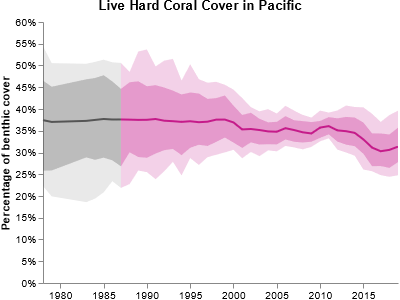

In [4]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Live hard coral cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Live Hard Coral Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "Pacific"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27HCC%27 AND gcrmn_reg = '+'%27'+region_name+'%27'"
    }
  ],
  "data": [
    {
      "name": "lhcc",
      "url": {"signal": "url_param"},
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": []
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "lhcc", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_lhcc", 
          "data": "lhcc", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "lhcc_mod",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {"name": "series_lhcc", "data": "lhcc", "groupby": "gcrmn_reg"}
      },
      "data": [
        {
          "name": "lhcc_obs",
          "source": "series_lhcc",
          "transform": [{"type": "filter", "expr": "toBoolean(datum.measured)"}]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Type: ABAB
Regions where the times series data follow an ABAB format (modeled, observed, modeled, observed). The difference between specifications were `region_name` and the years of the epochs.  

### [Caribbean](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGn-cyMdjsZDoORo-GHSmbSDUt6sdR2BFlWyoeUXdnwTTaOX6ADKuSJAFp2OhYMhLFb+SdWn6wABVMUGMDeGxgQisOx2KpgZToPDoMDe32WWQi8VSmXw7mLC6sQgpsJvd74IgkciuTQe9SuOjwcyNFvcVCkdCERiUAp8ACOdgA-IOALwugCiBin-wAKmAAFRgABiYoA8hKwNx4DIESnYIgEakCgjqA7UPu7Ih4PAEeh4GAAOrfKdiqdgRq9+DjgCkBQAOzfP8-wAYBYAAII8gAImAF7qFeCJ0mA46QtC7zge8sKFvu1IYVhkB6koAC6ixsqmmA4OSBqYlAJr6Ded62kaZp2B0kCEq8+hsZa5hMvMxZGtGiGpmcDxLL0NJSEWdFZIQ6jcH06g9G8imuNEQkXFavocd02qnPo5bIFgmEAJrvPMdH6gqeC2DIsAiTa1EkcREBkQSrarCSNGbIaWQMVAVwIPY7RaZJfRvDozLhWynbjHo6wUWmbxMfAwyQL4yB2Mobz6eYgl0bSOrUDS8SJLF0yVDI1Q4KkepCf59H8nlIWrMMRXKPFIRJKSGRgKkdAAGxkWARUyIwgRJHZKryGNrL2aVbw5HkQxuWAHl1Fcai9RSRU2IwxxvOw3AEJ2LFZG1NLBV5YVFXY6BanYq7Kke03qLN92PdlG7OA9hDvSqDV7ayB1HYxyDeEMsVXa1t0XUszDtfoAAK4SBGMpU7kKWqhIgk2OM4COZTYGC3FAf5ETipHkRg6gANY+SDtlSW81CKaWxPeIpznrHJUDeI+yDk01VItfovqaGoCJpR1ElGuWVFQLLc381k7PcKW7DdGzl77nSVMSbiOKxYru3y6LRqBZAaUIqguwPgjjya+oU0S+Eh2wDLt7peFFx2Tqjmk+b8t+WrLORQMjB2Cccuhxc1wKXlBkABTlqwqB0Pl6gAJQADzjgAjAAnAAHAAzIb8fGxJrnyzX7mxXTjMhw8ltZD0kdQOY2pO8JPMcWbjE+3bDuYDZ8uQNs1h7Hc4dZKWxnifHWRXBxsP6DdoUZVlOXJwVE8r5AOt3Jx8P6N0sNzZlh174x3CuOECLF6IhUr0a3QFOv59QJf8PX7vXKPFCDKWfq-Q+8cb4Jg4kqFUbwADEogkHILfu-AW0c7AbjKPAZgJ8kqwLWINQu5cIGhy6NwbgMctDLzQZxd03EoDAGWKsUyXwgi-AsCCIEDhQThHeHNd4YpcLvCwOnTOCEkJ0gEWZAyIjorIFXKTVMadUwZyzgZeQ5l3g5wEbw9QIinLKLEXQAhmi6AFD-NogRpdUh-i4T4Pw09kAGKUXgFReA1F2Afk-GxS5C7pDMYXbw2iMKAGQCbChi3HGNLKA3x-iMjvDoEEkJmF+GQhfnYwEDj-CBBcaJKJqjM5eMfuoMBfiAmJOSTnMJETXHuLUTEp+L9ykJKScE6pqSBESmFogXYIj6mZxRD6M0IYRyQm6TqbGO52CS0iFyByUIcDvAlLsbKfptFzCrivBuRs-YKl6UTOeaD0HQNPgQhBmohpDXLpXUhk9fAJiwY+XBMD7BwLqnQUQOyHjfM2L8u5fNIGdxpD3TAeysjc3OqfIeysR722UI7AFWwdiz0BUfReqY1jtwVGvU+G8gpX3QdlIBv8DKoPfsfb+28L6EpvsS1K3jSk2PJUfT+VLka-1pYA00ICfGpBZZAh57EzlvJpIg5BSCBVkKFU8nBqkRXKkIXQEh4LbIUKoQDI5xyoBcWFYw5hJlPjGHYX8LhtgeFOD4QIoR9IZAiOMRI-WNBpGyKwPIxR+SBnqPMJov8FkdGQj0XksmXrTGJIsVYyENjMmyF8Dk5xWBIleuKXylpgT2k1OhEm6JvKmWpDTZUjNnT0miBjdkpxwajGFLoCm0pzT4nppSeErNdSc2gPrRUtpKTLFdJ6X0rAXqhmwBGZYMZyztQQkFNM2ZqZdCwEWeM1ZqxlAbK2dXeeeJVVZAOeEGhgqMGvMVRc9gVyblSvuRg2VLyFXvIGnQQCvzqbrvrns7FXRWaMRCHdQVA9oWUVSnCse56jTT1WXuiSkAMUVi1RS3FSV8WQC3u1ABt8SXHzJUihUeDOgIb-tvFD9L9DnMw48Oy3B6ZYsVKKhBErJUkaNI0ShOhNVouOXQ54DDIBMKRoathYAOEAm4Vw5waTBHCNEdWx1yFnWQhkeYORjAUQepDcY7Ovr-W6MtfoxNrbq1hvMZYgN7xo32LjRWnTnrjG1oRHEztVTM3ZurY0vNBau0dJ7SWstZmAgJscx4opjKykNsLU22plmnO5qC3ZotHnx0sH7YO7Uw64SjvGROqZ3AZnhDmXOhdyyl3rJzpsjdWIN30eyFp9eZGKOHtvZAeBlzrm3MfXifmOy65-MakVYFbMOYA1ipC3mltMpCxFsacWOqPbSxViof9w9mLXw1lrPBkApMGx2aQ5KStfJt3DuN5k837yZa9mCvb0gzRu0m1LL2Ks9sBwck5VuodsX+w-Sc2Oqs2OJ0MlAEuFcC7Zy9dnHOa7dkbpewxt7UCPvzVod9-e6ggcGXzkXMuyRQc-PDh1zHDxNoKmbkzC2d2oegr7hC39SUYU2xHsdxFqqp4oqxRuyDZZMXgcnnBnDP9ENctQwj4DrJsNn2pZy-+RK77K0Cy-AXWGv54u53h5D4u0PObATLi4QrativgKIQu7BS7jy3cJS92Dr34Oox8go9GO7quY+zshuq3jcZWLx41-HTWAnNcJq1kIbW6HtZJvW0nqAuvk26xTCjdP+e9eodTkb3hBosypvToqzERqMyZrJ3nclJ6rdH6ztnWn2feM2vzDTIuF8be50TGTTOOJ85Wgp+epeiFc8X0vUfy-ttb8FtzBFRPdPiyugdxih0jrAGOiZk6hTHey7O2Q86wBLJWaoZdq6SutffuVndP2IcQoPTesVjWz3W5OZg038rzdHo+V8sr4d-mvuJ13SApP6eDcHnN2Fd4ES08N3t0DqKEOLOS8MGR8nOwuHKPOYudKEu6GB8RuWQQuuGvOhGkuJSNm-Kp+x8cu8GCuKBsBquzKWBmuh+CCOueuBu6uxujyF+Qu5yHyKqG+5CTG1CoBFKju+gzuLCRqPwHuQmQa1q4mDqQeUismrq7qnemcamWiRmieZemc+m6e1itide8ajeyagWleIWHSHe4W0ehB+avexesWteWe9eOe8hNaLebeRauhye+hkWHaReMWA+faw+iWwyKWE+aWkyU6s+EQ8+CyS+i6q+hWxWxyLWWIRuFWhyrGR8JBV+dWDWJ6TWVB++NBzyl+nQ9Bd6D6d+z6YOROQKUOiYMg360qFOnQVOtsv+MuDOM8TOFKUGjRtC4BCGSGYUyu-OWBSBeB0B3KRG1GWBsA1WlGOR9W5B+uf+bGjGGq9uk8HB+qPGrCbuAmZqwIAhvuQhgeiETqIeYhYeEhehai0hfq8echkhJiqe4ahmyhXm5hvmlxBehh0WoWLaxxmcBhNh3aNepaqh5mlh1mThVeDmlxquwJ2h-evaQ+-So+SW4+k+6WfhWWAR8yi+y+BWK6RWGORsZW0RO+VWikNWpB+gyRp6zW9+bWdE2Om6zMr2z+S2-WRU7+bBwko28xzUB2V2ns3sC2sOk81RPscck8jJ2susuxweOJG2psn+O25wb61sts8KCI7AZOOqLsl2nEU2N2Qp9O92QciET2RRtCPWUcMcu6n2cOVwSc+gf2yQAOqcqmyOOJJs4OTBpp72Fp-JR88OF8jp1awOBcf2gELpfyWOVJuOTc5gLc1E-Mb6HpL+cIp2P6UKlOn+1O3+ypqpmG9RYGrJrIzRHJFwbR3OHRO8fOfp8BTBvRIux8+BaGQJ4CCBv8OBXOtZiunRMBKujhTZTBCR2RFuUA4qEqaRZ+V6WRVG1+d6xCWBsxdu+ZDu9CeqXGBqKxvBnCnuGxWmomfusgAe0ea2Mm7wcm2mRx9hJxGiMhmmImueTeaiihtxUaKhZhaht5Gh6BWhfeJeYW55nxFeLxzhPxAiphsaDx6hVm1hRhthP5eeXeTSPerx1e0JvS7hcJnhoyPh0+06c+aJeWK+ayWJ4RaCkRtJFKBJC5rI-Zk5SRx+tyzZUC5+mRdBg5g0t+W+lJL6cZT+IKSZapmUlRW2AGmZDs2Z9OABLRkChZFFOK7K109Z3R9FNZkBHZ5ZqBNsmhmBilrZEBNIKlBGBB-5o5DFWuNGtGRlMqtBJlDBs5turBcR7BS5Tuq5PBJqG5-B25ghtq+5aih5+xx54hEeymsFUhl5Zxsh25b5xiD58emeoFr5gJGl3xOhMFd5f5sSAFIJxa7wIF5aDekV1ajZSVoJHxdA4JCFgFSFaWMJI+1aY+XhiJvhM+KJOWC+eFmJ6+EReJzO5F9l0qB+iRR+KRJ+9FFlTFVluRJFLWD+XFxRz+pR5R9yAlgpwlCKol-+jORZUAUlvVHOslbwZZ+laG2cRlSlul8lgxR6wxox419WtGvZMxtlLGe+RoixK5yxLl7ublXumxYmXlEmB5IhR5J5CmSmlxpxGmgaEVlh0VGez5cVAJTxiVUFbxlhXxyNlV2VfxL5CNJVhV6NxVv5pVPZRVWVg+KFsJtV8J9VmFGWzVgR6JIRBFHVxFXVZFlWeK11JJQ5tF8wU1EZ5wNJh8TU76DJfWXMlR-MI2gQY21sksPJM2glh2GUopK2vlVkPyMpKUsZxpk8ipNOMyKpfF52rsNIct02upd29kBpvMcpOtR8CZDyMOTBvpv2ZcgEDp5gSO5gIO+RocNJT6AtUZDMhOEk8ZJOvFb+S16ZNRBta1kC4lm1wBbO0lxZe1m851pKVZbGp1cM+GXR986B0uPR2lyB-RFZW1PZ5l-VA5U5ExuuUxVdGRcqzFU5g0Vu9Fc5dlz1l0jlnBzlfGaxm5FqImnl-u-1PlgNflwN4eoNJV4N5xUNlxMNdx-xeVCVH5GVkJ357xhNaNiFUJnmq9FhiNhd5VmVdhwVRN3eJNsWZNCWaFyWGF46jV2FqJuWwR+WoRhFoZAd1c+J7NO1EGVF4xZJqRxBJuY1XNrFk1HFhRod3Fbwr+e2LJaZWtX+R2sddRCdKdFdIBgDrIJZtZB1+dmdpwPRadouedXZDKG9J1JdfRVDAxFd6VjdeqNdSRkxlB4DTdZu7DSqjBD1LBT1G+PdHGy5XBru65gm31HlWxf1whEpoh-lhxgVYNoVENCei9JVy9T59x8VJ9qa+N29qN-5N9vxejONhNeN+9xjYJxNRjt9bhFN0edVT9U+tNM6uFH9+Fa+2JG+k1-9sRz1xlXN9WPN3DjFzd41g0eR7FBRGtM1ZCCZ81fFKDVR0d+tXscdZC2D+DrErO0GeTqd8uRDGdcBZDilFDdZZdalxG9FIxRJYxg5ddFB0xJpj1m1jwvdSxLua5rl0jW5I9cjY9CjkiQNAVs9hN894VN50N1xBmMVcNuVx9uNSNNjF9qVV9hjNjJhWN8Na9BjdaZ9W9GzXqZVZjyF99lN6FqWz9WF-hLVQRGJX9zNcT2ygTu6HNjTN1oDJ+fN9c1J60rkcwQAA)

### [ETP](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAUQAKgAFSBo-GHSmbSDUt6sdR2BFlWyoeUXdnwTTaOX6ADKuSJAFp2OhYMhLJb+SdWr6wABVMUGMDeGxgQisOx2KpgZToPDoMBen2WWQi8VSmXw7mLC6sQjJsJvd74IgkciuTTu9SuOjwcyNZvcVCkdCERiUAp8ACOdgA-AOALzO1UGVX-dVgABUYAAYmKAPISsDceAyBHJ2CIBGpAoI6j21A7uyIeDwBHoeBgADq31VYtVYEaPfgY4ApAUAOzfP8-y-n+YAAII8gAImAp7qOeCJ0mAY6QtC7wge8sIFju1KoehOo4koAC6ixsimmA4OS+qYlAxr6Je142oapp2B0kCEq8+jMRa5hMvMRaGlGcEpmcDxLL0NJSIW1FZIQ6jcH06g9G8cmuNE-EXJaPqsd0yDmG8ZbIFgaEAJrvPM1F6gqeC2DIsCCdaFHSesTlZD0fRvPZcaYOpCreiahAKQiACcogIoEjAJjI1Q+Rc1yyfpKasKgdAloFIUAHypHQABsYDDmAWW5TgZZJSlAXhMFoj4aJuKHIRupESRCD2GoSSUZsBpZLRUBXM1qyMa54lvDozI+WyHbjHo6ykambz0fAwyQL4yB2Mobw6XplkXDZ1A0vEiRjdMlRRTUur8Z1NH8utfXtPIYDUeNGAhG1GQFTlxH3ayMiMIESTWSqd0PTtNI5HkQwNRAxGxOgVytY5VGsjYjDHG87DcAQHYDVAN1vL1Lb9WNdjoOwK1Lsq+5-eoAMPUTJN2KuzhE4QlMqmdFIPUjKN0cg3hDGNOP6N0ONjcs-X6Jq4SBGMu2bkKJOhIgP2OM4WNLTYGC3FA37VVijWxBg6gANYku1EAXV0Q36NQcklqr3hyQ5zmiVA3h3sgmsXVSV36D6mhqAi83DC5KhkXNV4LYDztZNb3Aluw3RvLB8F0jr6IWWNZbkWSTme4a3WQPNCKoLst5Y48sfqL9PvhMjsAB+HZeGtZ6C2fZbXB2bHdN5bLsRScQdRwqcWnILunqAAFCVyUbeoACUAA8Y4AIxBUFAAcqfO7Von1Vv1FQ6yBvG+3zu54N7n6OYumN1k9uY3cM1ZwX4dFyXmBbaJkDbNYex3F3kAlgMiJQeWQrisQFj1YWvcVprVHptGKn8E4PwgZAIW+NbrQNWnNbgrgKohT4l3LI3QCjgPQddMhd0lrIywZxcq6hKphWQBFWYH9B5UPjKxJUKo3gAGJRD8IEQQkBAkIr0zKPAZgSDppcLWFlJeABmVhUcujcG4HYHQzM-7CMeG6DiUBgCi0Mp8YwQRfgWBBECBwoJwjvDuu8MUWF3hYCngwM8O46R2OMmPJxI1kBLnVimSeiVp5j3kCZd4s87HWPUE4+ygSXEyLCXQAo34Il2LXqkb8FifB+G-sgWJAS8BBLwKVOwOCKoZPnEvdISSl7eAiahQAyAQYTiUUlxqUKmpCqTU94dA6kNLQrYyEIUsmAhyf4QIBShJtOCXQMpuD6EhW6RkXp-TZ5NJaYU4ppUOmLNEMs2p9T1mDLsRKd2iBdhOO2clFE3pTTBnyu8M5LdZabnYL7SIXJbJQhwE83YK1fQRLmJvKO28t4IIuBclWWjtHsJYg-GRvD2DsGytleR8ihGwt8PGVc4jJGcPsNwnAWVRBgpqsHMlWIEFnzEhfKAV9vLByWg7Vimcw7XlfsoUuSjYo7F-k7EBADSwpjWDSi4YDkFkP0HjFqi1lo0KgDPTFwjUGkNlYLKBVCYHYIWQiDJyrBXELVWLRVmr5WwKgLsvVqQDVsOxfC6RhKaR8IEfw21yj7W4rvPihFTqah0EURCqyqj1FaGAbC9iDrIAGOYKsIyXxTF-AsbYKxTgbF2IcfSGQTiXFJ3cTQTx3isC+P8dM65dAZ5hO-KZSJkJolTI1uWxJvSUlpMhBk0ZshfATPyVgVp5b5mdIOaso5GzoT9vaXQ61w6+mjpOcM0Qnbxl5IbfE2Zg69kzrWWOidsyrVLOqSs2dAzUmnPOZcrA5bbmwHuZYR5zyISCjeR8lMuhYA-MhBKf5qxlBApBXvYRPKFRQvCOGu1oiCXKmdci1F6L3XOzhV6iRSlfVQf9X+SladB6YaAzSi2dKC4hFukyu+jtOhsroi-YuXL35Bq-ny0V-9AEirA8oiV00UEyoJpgi1qCx7wcQcamkaDZWUPNW8RFQHWSwGstwQ2orFR+v0C611AnWSNDURo1jbDI1vBjSsIxCawBmIBJYixzghn2Mcc42ZeaEIFshF48wPjGAolLY2lxlbwm1vePWvtWyElOqSa2nzHbsndpXf5stLiN3TsPYcgZzTx0Bb3VOyp8WR0nssyM8LuSAi9t3SU5KsWD09OPccpLhWdlTtK0e7d86nnnt-Zelx17b15U-bpR9QpuDvPCJ8t9H6-mqB-X+wheIu5ScNCBkeHHZPycg0SqAPCYNooxXMTDusAPnF3psD+5s3I0hjrbMapHtMuzdh7I03tsY139oHShFGoAPagMdwg8dE5uPs9UMlSjH4n1Enh-Ohdet10ZTpiuVdbt+zrg9plzdW7qwB4PMV3cCPYv7pHWFw83gr3XovGe5aZ6z3-eiINndtG0ppBj0DWOVU47gRPTzY8F5jgKKkJeG9JvB12w8MlB8FRHxNjneHPdIAMpvi7FlD8nvPw5aD7ldHv7-PO8WYV5YYUqvY50TjZrqG8aVVNi4UiddStNRQnjOq8FVSN4aI1kr1Xm9E5b2haVQrhUij98nIiOGoaW5AHh8BRBL3YGvWj43EN4pQ46tDxLkm29ciGrTmuI26KjfpuNxifhJsBCm8z6bISZt0Dm2zX2PGOaLSWlLRWK2hO81EtNMSosedmc25JqTQuZNyz21dMya+xfS2V+rlXq-VcCoPurc7T0LqXRF-LveB3lM3Rl8rO7R-JX3fslf9Xp+NZYBeq9ukb1wjvZ1l5T7Qf9dfbId9YBflfpG4C2ewLxubb2977IjfVcKntYt6DKK1s1Mf9REkMfUY8lsSU38ttQUnJcNRcCMJc6MzsZdQ5KN5d3lFcmVld+VUchUgEU82Ftc2IzdIAuMMEtUFU+N4EI8TdiDHdUE9dtU6Il9rUgDjcSEHcTUGCLcKDeMrV9UE9e5fdwDnUg8Q8w82CfcxFvVo9OhEU49A0I8NNQ1NEBVKc2I089NDF40TFjMc8zN60M1rNc0y8HN3gnMm8q9otZkvNq021fNG8F9AsoNgsO90ku8xk59Jlm811+8WCJ8EsKtNlrCa9+Cult8p9stF1u9IsqtisWDatAi18Qix9rct1Iiz199mtD87kT8OtGtz8es+sIhr9vk79P1v0n8X9KcoC8QP8Ztv8Lhf8-d-9YN1tvdb4QCo9aD5C3oMNudsNYDqV4CaRIpiM7VpdppZcQcMDw82FsDGMVVmMNc1DBUiDdceDxNGdJCiEhNyFndeCJM-VBC2J5sFNeiA8xDQ85jYVlDk9ViVVdN9AM9DNdCTNk1gRDDC9jDS84J81qBC1nNi1XM-F19a9zAq0a0G8LMfC+9So28Qt3DZ88tvC4i5l-Dwih850R8UiN80tMTJ8ss7EctPCUSCswSSst8sTEtgiW9QiasqTCTjld8zksirlWsj92t70utXlL8Sivlb979Kjf1n9Sc+dJt6iv9kEzi-8kUAC4MNsKVYD942YEYrIxc3s7ZJjc4lpLtv9rtmRq4Yd64GI6dP5piG4zTWQ3sPsrZTDqhlS+cM5UDs5T4mVgcqMS52BJc2JIcaRfZa4TSI54cbI7Ikd4YQFUdz5qc+5adPpscrh4p9B2dOcCcx4icWcxT38u4oyqcPJYzTgrTlEGdFV0zmdzBWcUygoszoDnZecsMdsxohdkdzg8NDs3hECSNtT-s0CbxqMERvSpt6Mf5FjBVljRytc9jpVGDKDDcOjFUpynduNDjmDdV8ETj7cOMSCRNlytjLUGSdihCHU5ClNltXU3UTjPVujZS48FETi7iw0CDBUnj9FtCs9E1zFc9PjHCjCs0S8a87Ny9zDK8QT3NfDSpbCoS61HDYSm0gsW03D20PCu0ySnD10MT0iaTktcSypx8CSkiGsSSUKe9YKYsEjGSCKcS6TUjl9qTmTLNWSLlsiOTciHkz9utn0r8BShsH8AURTqjtFajbdP9oUHiPUIMWi5S2jDzI8ZCejTzICBiYDwURc2F2zL44RwcPVuyLSOV+zBylcGNGj9z8CxKEN1iSCyC5V9d1p+MNzFzuCDi9yC4MSZLNzTd6CdzyDnKwiZLmiRDeFzybd5zZLkN5LY83pFD1CHzVDcysgXzo03yjN3ivzU0LNfzi8bMAL7TATLDQKwTIL7C-M0SETEL3gwtSSSK0SB98LMsgjsLqK8S8LML6LiTojKrYiKTyKWrkjGrcK0iIiiTOs2SWtZk2s8juTCjOL+TBtyjhs+KxsaiJT-4GinyEN-KTyIqA9VsFSQqry5Kby+ihKlSVK3S1KxcxifTkCpiXS5c+yvSgDhyVc1qFRxzjLQEHKrKxMbLtj7LODhMZzeNJMQqZM5IFtJLlMgqZKYr3rDQEqXidDs9PyDCfzvi-ysrSpAKzCLCXM3MCq687CfNiqwTSr7CKriLOqcKaqer3gqLwKmqh1BrWqZ8Yj59SL0K1yKK6rer6b+raKmTcIGKmt2SxrOSJr2LeTiiBsb8eLhTFrBLlqVVVq5swbzjTztr5T1s38cMVScRzoHp1LXsbZmZTttSnJdTAgrt84Az7tLSQ5ZpezFobSpFIAsaft04HontTZWz3Sbs7qEQFdvS6NpBTQoc2I7tYdLSQyW4wy4IWyzrbixcadCz4z6dEzZtIAqy0zzAMyKyayJtB56yCIHgBcLhmyIyHg2yxdOyJj74bqHbnsX5A7HqFjjK8CWMXrWQLL6CvqXdSzqD1DaCUEvLrKmDntyK3KOCtzPLAb-I3c-KJKArlMriJDLyuiDqIa3oCh7yk9HyzLlF4akq3j9C88virN0aTC-jvtcrcbQScLCqiaYKSr4L28ybkLl02bqqMKmaea4SGb6EAjubCL2qKbP6urOaaa6a-6+bKoaaWThbRqa9xq2KCiOK+TpayihTH9+L87azQVJTRLcy4VDqNbpK16cVrzN7FLAMTqaphjzqEDNKrqdLbqZi64DKsCjLO6mJ1cJy1jPrZ7fqQqh7tzBHx7dUBDhGp6PKuCR7vqx6hU8KF7hDNr-dA9g9rjlHpCwrDqsoorbjd7Yrxt4rNDnij6kbTNT7Ubz7MrL7k5saQK8b76CaoKHCYTn6XCEK37kSqrwHGa6Lf7y0wi4GoifHKa+rKTIHaTebN8QnMimKRakGxaUGH1JaX1uK5reLRtRTX9FbBVlaiGNrFMtqVtNatHQDZDimIC6B+iaHBjTrAcRi5oiNmG67yNWGm6MCOH5iuH961dTKiHu6uDe6Vz+7Tg-rp7ZGxGqn2gTjQa5M1aSmV6biVUYbuHpNTHXzY1XiLGPi0qC8bHZB-zMacqK8gSrC+qH7oSbF2aa9SbO8wmwGqbv6AnabonoHgmf7gHHnUS-H+bKL3mgmGS4nhqEnEHSpkHT9UG0muLZqsGFqcmlrAMCHQNpTVaSHSmyHtbHSdsIYwB6o5ggA)
Specification includes an extra transform to clip upper end of error bars to a maximum of 60% when drawing (actual value is preserved and displayed correctly in tooltip).

### [PERSGA](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkABQAomKAMrCgCCkDR+MOlM2kGpb1Y6jsCLKtlQ8ou7Pgmm0cv0WtyRIAtOx0LBkJZbfyTq0A2AAKpigxgbw2MCEVh2OxVMDKdB4dBgX3+yyyEXiqUy+HcxYXViENNhN7vfBEEjkVyaL3qVx0eDmRpt7ioUjoQiMSgFPgARzsAH5hwBeLXqgzq-4AFTAACowAAxMUAeQlYG48BkCLTsEQCNSBQR1GdqAPdkQ8HgCPQ8DAAHVvpr1WBGv34JOAKQFAA7N8-z-ABgFgLqPIACJgJe6jXgidJgJOkLQu84HvLCxYHtS6GYQaOJKAAuosbLppgODksamJQOa+i3veDqmpadgdJAhKvPorE2uYTLzKWpqxgh6ZnA8Sy9DSUglrRWSEOo3B9OoPRvAprjRIJFy2v67HdMg5hvJWyBYBhACa7zzLRRoKngtgyLAwn2lRsnrC5WQ9H0byOYmmCaQqfoWoQSkIgAnKICKBIwyYyNUfkXNc8mGemrCoHQ5bBWFAB8qR0AAbGAY5gDl+U4JWKVpUF4ShaIhHibihzEYaJFkQg9hqEk1GbCaWT0VAVytaszHuZJbw6Myflst24x6Os5EZm8jHwMMkC+MgdjKG8ekGdZFx2dQNLxIkE3TJUMU1IagndXR-KbQN7TyGAtGTRgIQdRkRV5aRj2sjIjCBEktkqg9T17TSOR5EMTUQKRsToFc7XOTRrI2IwxxvOw3AEN2Q1QHdbz9e2g0TXY6DsGta7KseAPqEDT0k2Tdibs4JOENTKoXRST0o2jDHIN4QwTXj+jdHjE3LIN+iquEgRjPtu5CmToSIH9jjODjK02BgtxQH+tVYs1sQYOoADWJKdRAV1dCN+jUAp5bq94ClOa54lQN4T7INrV1Ujd+j+poagIotwxuSoFELXeS3A67WS29w5bsN0bzwYhdJ6+iVkTZWlFki53umr1kCLQiqC7I+OOPPH6j-X74So7AQeRxXpq2eg9mOR1ocW13LfW27UUnCHMcKglpzC-p6gABRlalW3qAAlAAPJOACMIUhYB6eu-V4mNdvtEw6yRum53rv58Nnn6OY+nN1kjvY3cc050Xkcl2XmA7eJkDbNYex3D3kByxGTEsPLIVx2JCz6qLfua0Nrj22nFL+SdH6QMgCLQm90YHrQWtwVwVUwoCR7lkboBQIEYNuuQh6K1UbYO4pVdQ1UIrICirMT+w9qFJnYkqFUbwADEogBGCMIaAoSUVGZlHgMwZBs1uFrByivAAzGwmOXRuDcDsDoVm-8RGPE9FxKAwBxbGU+MYIIvwLAgiBA4UE4R3gPXeGKHC7wsAzwYFeA8dJ7GmQns4sayA1ya3TNPZKs8J7yDMu8ee9ibHqGcY5IJrjZHhLoAUP8kT7EAA5Uh-ksT4PwP9kBxMCXgYJeByp2FwVVLJy4V7pGSSvbwkT0KAGQCLC8SSmuPSlU1INS6nvDoA0ppGE7GQjCjkwEeT-CBCKSJDpIS6AVLwQwsKvSMj9MGfPFpbTimlPKl05ZohVn1MaZs4Z9iJSe0QLsZxuzUooj9JaMMhV3gXLbvLXc7B-aRC5PZKEOAXm7DWgGSJcwt4xx3tvRBFwrlq20TojhbFH6yL4ewdguVcoKIUcI+FvgkybgkVIrh9geE4ByqICFdVQ4UqxIg8+ElL5QGvr5UOK0nbsWzhHe8b9lDl2UfFHYf8XagMARWdMaw6UXHASg8h+gCZtWWqtWhUA57YpEWgsh8rhbQOobAnBSyERZNVcKkhGqJbKu1YquBUB9kGtSEa9huLEUyOJTSfhgiBH2pUY6-FT5CVIpdTUOgSioU2TURorQID4WcSdZAQxzBVgmS+GYv4ljbDWKcLY+xjj6QyGca4lOHiaBeJ8VgPxATZm3LoHPcJf5zJRMhDEmZWtK1JP6ak9JkIsnjNkL4KZhSsDtMrYs7pRz1knK2dCQdnT6G2tHQM8dZzRmiG7ZMgpTaEnzOHQcudGyJ1TvmTalZtS1nzqGWk85lzrlYErfc2AjzLDPNeRCQUHyvnpl0LAP5kIJSAtWMoEFYL94iL5QqGF4RI0OrEUS5UrrUXosxZ612CKfWSJUv6mDgbALUozsPbDIG6VWwZUXEI90WX32dp0DlDFX6lx5R-EN38BXioAUAsVEGVFStmqguVRMsFWrQRPRDSDTU0nQfKqhlq3jIpA6yWAtluDG3FYqAN+g3XuqE6yRo6jNHsfYdGt4caVjGKTWAcxAIrGWOcCMhxTiXHzILUhItkJvHmF8YwFE5bm2uOrRE+t7xG0Dp2Ykl1yT21+a7bk3ta7AsVtcVu2dx7jlDNaZOoLB6Z3VMS2Os91mxmRfyQEft+6ympXi0evpp7TkpeK3smd5WT27sXS8y9-7r2uNvfegq379LPqFNwT54Rvkfq-QC1Qf6ANELxD3GTpowNjy4-JxT0GSVQF4XBjFWK5jYf1kB84e9Nif0th5Gkcd7YTXI7pt2HsvZml9rjOugdg5UKo1AJ7UBTuEETsndxjnqgUuUU-U+4kCOF2Lv1huzK9NVxrvdgODcnsstbu3TWQPh4St7kR3Fg9o7wtHm8NeG9l5z0rXPeegH0Qhu7jo+lNIsfgZx2qvH8Cp7eYnkvVe68Qrk6IsPfbDwKWHwVMfM2edEd90gEy2+bs2WPxey-Ll4PeUMZ-oCy7ZZRVVjhWqzjnRuMWpofxlVM2LjSN1zK81lC+N6vwTVY3poTXSs1Rb8TVu6EZVt5T0RnD0MrcgLw+AogV7sAyfRybyGCVoedRh0lKS7fuTDTprXUa9ExsMwmkxPwU2AjTZZzNkJs26DzfZn7njnMlrLWlkrVawm+eiRm2JMWvPzNbSktJ4Xsn5b7euuZVf4uZYq416rlfavBX7w1hd56l0rqi4V7vQ7Knbqy5Vvdw-UqHsOUvxrk-mssCvTe-Sd64QPu628l94PBvvtkJ+sA-yf1jeBfPUFk3tsHc99kevauFSOuW7BtFG2NNf5iIoZ+pR4rZkov47bgouT4Zi5EaS4MYXay7hzUYK6fJK4soq6Cro4irAJJ7sI64cTm6QA8aYI6pKoCYIJh6m6EFO5oL666oMQL62oAEm6kKO5mp0GW5kH8Y2qGpx79ze6gGuoB5B4h4sFe7iK+qR6dDIox7Bph5abhpaJCrU4cQp4GZGKJqmKmZZ4WaNpZq2b5ol5ObvAuYN4V6xbzI+a1odr+b15z7BYwahZt6ZId4TIz7TKN4bq95MFj5JZVbbKWFV68E9Kb4T65bLqd7RY1alZMH1b+Er5BEj4247rhEXq76tb74PJH5dbNan59YDYRCX6-I37fq-oP5P7U4QF4hv5zaf4XDf4+6-7wabae53xAER7UGyEfRYbTZUrQG0qwE0jRSkYOoy6zRy5g5oGh7sKYHMZqqsaa4qHCoEF65cGSbM7iHEIiYUIu7cFSYBr8EcSLZKbdF+4iHB4zHwqKGJ7LFqr6b6Bp7GbaFmaprAj6H56GHF4ISFrUDFqualrub+Kr7V7mA1p1p15WZeE97lQt5hauHT4FaeExELK+GhED4LpD5JFr4Zbonj45b2J5buFIlFYgllYb4YnJaBFN7BF1YUn4mnLb4XIZE3LtYH6daPo9bvLn5FE-LX637lH-qP7c44agJ27v6woLYKRLZNEop-4IZbb9G7YNQcxIw2Ti4fYOzjH5wrTXaf63bMi1xw6NxMQM5fyTFNxmmsgfZfY2zGHVDQGZxPQvbmznAg53by4Pi0YIjsBS4cTQ40j+z1wmlRyI52QOQo6IygLo4Xy04Dz07fS45XCJT6AE4hRE4Twk5s4ik0o9wxk05eTxmnBWkqJM7KqZms7mDs4FDpB2p9G86OkPCC4XDC6o5ulDFvDwFkbamA4oFelly+kzaMa-zzHCqLGjna47Gyr0HkFG5tHKpTnO68b7GMH6oEJHEO5cZEFibLkbHWp0lbECFOoyEqarbuoepHHeqdE-6BqKJHE3ERp4HCoPEGKaEZ7JoWLZ7vH2EGE5pF5V4Oal6mHl5AmebeHlTWEQkNr2HQktohZtouGdpuE9okkOGbpompFUmpbYkVSj54kJFNZEkoVd6wVxZxH0kEVYk0nJGL6UmMnWbMlXKZFsnZFPIn69avoX58kjZ35ApCmVE6LVHil1FPlIaNFCFyktGHnh5SFdGnngH1lQGQqi7sLHadlwiQ5eo9kWlcremDnK5Mb1H7m4F3EcaLnEEzmG6CYbnmU7mkF7lFxonSWblm60F2UKoG6BR4XSXiUnnR5nnnk+UdGyU3lyH3kJ6PmmV6bqGPFvkmavFfnppWa-mF52YAX2n-HmGgUgmQW2EBYolwmIXvARbEkkUol974XZYBHYXUU4l4WYX0WEmRGlXRFknkUNWJG1W4UpFhEEndYsltbzIdY5Gcn5GcW8nDalGjZ8UTZVHTa1Ef6iVfy+XKb+V+7rYKnzkyWoZyX+U5S9HAZKl1SDGqXi4jF+mIETHIGvY0YDkAHDmq5LXq4mX5nEHmUkEeUMHlmUGqHUGoLuUSaeX6DSZbVybSmnGnl+7nke4KERXKH5lZAvmxpxUvG6E54fE2Z-lpXlSAUmFmFuYeY5U142F+b5UgmFW2ElXEWtU4UVUdXvBUXgV1Ujq9WNVT5RGz6kXoVrkUVVWdVM3dW0UMn4QMUtaslDXskjXsXcmFFDZX48WCmzWCXzUAIiVSkKYQ1rVrbymbYv54YHyqldRPRqU2x2ysznbakuS6mBA3aFxBmPaWlhzzR9nLQ2nSKQC41-ZOmsgukqUqKg6vyK6+kMbSCWgw4cQPbw6WlhltwRkIRtlnwKHi507FmJmM7JnzaQA1npAZnmBZlVk5lTYNnKmbDNmmitlRkPAEYm2MoaUXXaXXWekIhB33VzFGU4FsZPUKirFEEfWA1fUUGnA2XsGiaWXW4HLOVsFbluVj1u425BWCF+W+7+6B6XEL2SE7WhUfQFDhXaaRUI24wxWvnxrPGZ6fl6E-mfFY1GE-G-aZUE3Ak4W5Wk0wUFXwWt6U3IWrqc3lUYWs380wnM0MJ+F82EXNXU0-1tU8302M2AOC3VT01Mli2DVV7DVsV5EcU8ly0lECn378WF2QG4YLWSmvUrVnHa1SWXnBWb2ykx7kqKUl04gnUqI10S510IEN3O03WoENz6UYGGVd1ZDjlGVgLvWz3fVD1bV-XbniOOX6p8FSNT2uUcEA2u77neVUOL2rXL0XFiGaMb0gFL1yJBq71KEiOmhI1PFaFn3mbo2X2Y2pU32px40gWE1P3E1QV2FQlv1OEIWf2IllVQMs10UAOVohGIMREBM01dXkkwPUkC3r4RPpFMXi2oOS3oNPoy1vrcVTW8XjbCnP4q1qpq2kNQa0OrYbWtFh5XkhXlP7VCVHX87MNIasPnUcMPxXVcNN0t1Dlt2CPGWd1RVfw920F91qOD3OW2WyMg1h5g0a1b3nGr16NbUPnw2TaI1H3I0n3WMfm2PfnJVX2OPfHON-Fl4AkWFdXP2Qm2Jc1V4U3t5ROQO01-0hMM3xNwPhP-1gOPPIlBNC2UXvNhN0lJP9UpMoPlRoPH4YNZNcWTW4MzUFNzXAbEPgYoInELMUP-6Km4aNl7ZQxgCNRzBAA)
Specification also includes upper bound clipping for drawing.

### [WIO](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAdQAkgB5SBo-GHSmbSDUt6sdR2BFlWyoeUXdnwTTaOX6ADKuSJAFp2OhYMhLJb+SdWr6wABVMUGMDeGxgQisOx2KpgZToPDoMBen2WWQi8VSmXw7mLC6sQjJsJvd74IgkciuTTu9SuOjwcyNZvcVCkdCERiUAp8ACOdgA-AOALzOgCiBkn-wAKmAAFRgABiYs1ErA3HgMgRydgiARqQKCOo9tQu7siHg8AR6HgYFV30nYsnYEaPfgY4ApAUAOzfP8-y-n+YAAII8gAImAZ7qBeCJ0mAY6QtC7wge8sIFru1KoehOo4koAC6ixsimmA4OS+qYlAxr6FeN42oapp2B0kCEq8+jMRa5hMvMRaGlGcEpmcDxLL0NJSIW1FZIQ6jcH06g9G8cmuNE-EXJaPqsd0yDmG8ZbIFgaEAJrvPM1F6gqeC2DIsCCdaFGEbqREkQg9hqEklGbAaWS0VAVxuasjFZD0fRvDozLqSoHbjHo6ykambz0fAwyQL4yB2Mobw6XplkXDZ1A0vEiRRZA0yVDI1Q4Kkur8T5NH8tlgXtPIYDUWyMUhJ5GRgKkdAAGzEW1rIyIwgRJNZKqte1BU0jkeRDM5EDEbE6BXB5FEUu1NiMMcbzsNwBAdsFUDNW8AUtkFpV2Og7AZSuyoHhN6hTe1N13XYmrODdhDPSqtVbayO17XRyDeEMpVnfo3RnaVyxBfoAAK4SBGMhVbkKd2hIgY2OM4J1pTYGC3FA374ZsuIrVkGDqAA1iSXkQPVXTiW81BySWBPeHJDnrNJUDePeyAk-VVKNfoPqaGoCLJcM-NZGW5FQLL02iYa7PcCW7DdGz567nS5MPLiOKlYrnn86Lhp+ZAyUIqgux3idjya+o40S+Eu2wDL14pVFFzWegtn2ebatUaHVmswMjB2Cccvhxc1yydlunqAAFGWrCoHQOXqAAlAAPGOACMACcAAcoiG6HxuiU5as18tpU0-TIeiZbIWR1A5i6U7Ak86xZt0T7dsO5geWiZA2zWHsdzy0xpYpms7cKlcrFQ-5sMC7tmXJ7lfsTzrdxsZdNIwyfqXpTvdHcK44QIiXlfj+HkDdAUa-n9Dm9pdvWWcYQCn30fvvVkvh4ysSVCqN4ABiUQsC4F8TnhcUBn0yjwGYIfeKEC1h9SLgAZifqHLo3BuAxy0CJeOhp2IsX0MAeGhlPjGCCL8CwIIgQOFBOEd4rV3hiiwu8LAGcs6wXgnSbhxkU78IisgFcRMUzpxTJnbOKd5AmXeLnbhHD1D8PsnIwRdAsEqLoAUb8ajuFl1SN+VhPg-BT2QNo2ReB5F4EUXYG+d9zGLiLukQxRdvBqNQoAZAIMI6McXoksACPFeIyO8Ogvj-FoS4ZCB+ljATWP8IEexQlQkKKzq42+6hAGeO8TEuJudAnBIcU4xR4S74PyKdE2JfiykJO4RKYWiBdj8KqVnFE3pTTBmHJCNpgcMZbnYJLSIXJbJQhwO8CUuwMq+jUXMKu4cG6iQIayDp+NZ4UKyMg8B9hIH6Cgewdg-V+q4NwQgvZW94yalQegw5ypsF0FEOso2c8Pl4n3svFmYV9Dd0wMAgW-cj6D2VsPe2yhHabMNFPBZ5DCElgMki5+q8j7r0gBddyF8f671OHC1kGDOhYrPri1q38Mq-2Vm4gp5ibl7Jfm-TFH8oDkqulvalJp-7uNSIyih38wFHywdAuB8CiUKmQQ8+8TyRVHNefgkF-tiGkN+rs25p03QcSgLQ5gqwjJfCYX8Vhth2FOE4dw3h9IZD8L0cI-WNAxESKwFImRWTulKPMCo78pl1GQk0Zk4mnqDExOMaYyE5iUmyF8OkuxWAQmeryXy+pPimnlOhImsJvL6WpFTSU9NLSkmiGjWk2xQbdE5LoMmgpdSolpviUEzNlTs0ALrcUxp8STGtPaZ0rAnremwH6ZYQZczdIQkFGMiZKZdCwBmUMhZqxlDLNWdXRBPz13ZAtacDVgqDnypedAs5FyrkCvjkKlBsqlIHuOb1Ogf5vkETWfzOFfzQo0gTDIFqc80pgvihCm2ULR5ntZAimefNBUosXmiwhGL4pYpxZyqlV92UpxA4Qklx9cWf3PpSy+NLFQKvQ2rNi1luC0yXoRw9JzxWwOIxPRoJCdDqog5qti2rqG6roYaxhYBmEAjYaw5wiSeF8IEVWh1CEnWQnEeYSRjAUTuuDXonOPq-UaO3RW7Jzis6hqMSY-17wo1WNjeWhNLaq01oRJEjtpSM1ZqrTU3N+bO3NO7cW0tpmAjxoczp6tdLCn1oLY2ipHrW21NEC5uzRax0sD7QO3SQ64QjqGeO0Z3BxnhEmbO+dczF1LNzis9dWJ12SqyNs8Ia8yMUeebeyApzzmXOuXMR9eIX3UTrhTOq7V31sw5r9Uq3Njq7qlULEWRpxanQ9tLFWKgyJJR9qlDWWsMGQEkwbdZBCEpK0ZucP51tbYZa9sCn90hTRuym1LL2Ksf0ByDkTVu4dl7+07kK2OqsmWJx3VAUuFdC4509TnXOq6jbKtY4K3rUcY6VY+4Kr7BLAcpwLsXcuJcQfojnp1z5DwqYKmbgzC2t3XtAt7vsv9nQAOHfGbCkFk8djgee1AKD5YRvovfthjeuGuUoZfmhsrhpMNkq-vhpKAWH70eJSy+DbKX7C-xX-NtQDit3M450UVJz4CiCLuwMuY8wf7OjpetB17MFEeqkY-nIVVXMZg8-Khbw9UrHoUavjJrARmqE5ayE1rdB2ok3rKT1BnVyddQp6RFm-OqdUYZwN5mwtVr0+GwzxnUleYyXH5TlmAs2YadFptvnqk5us3moLrncIieSSZmx3mtNJrF5F0vefQuZ7805wLtnC3udix05d-a9GDuHWAUdwyJ1CiO1lmdsg51gFmfM1QS6V3K9a1iMHW6dng-Pfu031GoANZPc1-XKuZXG8w+ru97zStfJfb8onAKu5whO8-IbvMKfzaHjeBER2ac-rA0vTdzO-9blsV2cEZOcKVucCMc4JcFRBcZcOUWoIDRd8li9oCLhX4QDT45duUFc+VUCBJDdasaQoFNdtddc8CDd7lHkTc1czc70lVlciEmMyFWdz17caFuMGEfg3dBNA0rUxN7UA9REZMXU3UI9FEo9fUI13hY8C9dMFVDEk8zELEq841a89ErMc8G1ml88xCs429NDgs3MK8S0VCzNZD-NkD21c9C0dD49W8i8rCtDy8e04te8Es+lksh9UsRlJ1x8IhJ9pkZ8F158Csitbll8N1BUKtvtGcKDVcqM6s98mtyCj8qDT9aC+oH1L9n164b9n5IdlYQhv0n9ydtsFsP8v89cf96dADz0ADbcJ44NSUZdEMEDkNIC+dD8X4MCmoud2i3hRVLdTpqtKMz96sSCdcqigDGM1UGiSM2CuN9VndeN+NTVgReDvd+D-c4JHUg9hCQ9RC7DxDlFo8NNhMM9K0-NE8DMlDPNq909zCNCS8O8Qtm0ji9Ci8DCy8YtK9U97ifNdCLCIsosbDm9LjC9FcQSu0RM2lXCul+9EtB9h80tfDMt-Cplp9Z98tl1Ct0dsd45+c19KtMURjCCj1GtT0Wsr964OsAYw4I4781t+suZyd+Y0oxs5iGpmR3YrtvYGJYcJ5KdFsBTWRltCBtZdYdjA90dNtTY38yRCdn4DsgMYV2BSdToXYLs2JptrthTbsbI7IHtNoKFYixJGTQF3thpPsrgk59BfsS5-sU5EdzBgdSswdTT-kaQLSYcrS4cbTvtedzBnS85C5S4S4i48SKZMd2sccm5zAW5jS25b8aQSdadn8B55TAMP9oUEQ1TJU6dp5ajn56iWCSMmisNQDsUsCecoChjujWUOdZc+iRdr5LClcgD0CGzKz4C8VsCmcHD2ymUt8aCd96taNBy91Ddj85Vt9b0cF6DpjrdmCN9BUFjIBHcDVODjUWF3d1jNM+CbU-c-N1tpN3hZMtFQ9FNASJD1MA1NMLjtNFFripCU8Y1-i1Cs9kCvim83iW8ISU1G9O9jC7jVCHy682yoTtCwTHyPjITALoSXCe94Sq0B9PDkSfCx80Tssp9cs59FkcSwi9kIjCTojOSkECCb0iDj1ki6zpU0iyTzcL8KFWtvlX1ky3hUyf10zwVMzbYcy8zadf8yL+zUVSzGiej9BWjeyazOiGDYDGyey8N5daUvz+U6zOzpcFLqyCN9C1KujhyEiiDxyUiL1pzqDDKag6AFymUZibcxL5iOMHcOCXdVjdzzVhMDzfdxNjzBDTzzz5Mrz3ivV1A1MpCZDATnzk9lC-jQLHjs9njrDXjzDdLILnCPNTCa8wL1D69Ur3hbC-zYLgT4KjDEL4sESPCBlvDR8p0J8MTcLsTF9wi3TN1SL7KpUKLZyqKKSD8GC6Kr10id9MjiLqSNk8jCECibYij1Tf1ht-1eKVTczoCCzEU2qsgSyVzYMJKwCkMWzUM945KtqmzwD+j9BBiujYBSTKKxVaMTLbLlzTSsg1yNzliuCdyeD9zNjDzvLFETy9izyRCw8lNwSs4bywr7zzDIrbiMqHjASnjcr8rga6AUriq0r3hfi3zYrYacqUa8roLPU29HDDDUbYSkK+8ULES0Kqr0ssKAjMTgj8LGqiLmqojt0qs5IasrqTlqLKSWKYzzgsdIjvIetXsxSWTZrLZ2TAhxtrZJZPY+TfY5tEp38FamTNZxTVtfrzJQd2oIVdt6SSNlSKjqc1TacztXYaRZaZs9T8iDTg5EynsGCJrvTTgRTCF4c7SS5wzHSgyVMkdIyStw4Ban1+a4y6YCc1Y31icH9pruK5qlbIUjavYBLqjCzhLIB1qPTyyENtKCUTL5Luyc7WyIs86pdmitLmzlL06ByTKDKxjiCtdJia6pz6LOa70Cg6y7qWMHqtVngdV1znKVjuCPcNjRMvqBCpShD-qDjAbryTjJCY9waIr5Cw0bjI1oqMazCsbVL4a8bwtnMcau90ay1Mq4qIKcaEaYKkaBzcqu8SayryaKqUsx0MKar0Scsgi8sQiCL-aozmLV9WqNqSNa7aD6tuaeqgC+qT8GLz9hqcjRrFTxqo6e40zSihTE7Fr8yhLVqRLoNsGsgs6WjC69rCUuj87MCK6+ybZ4qS7DrFLECcDc0m7hVOroEJiyDaLm7+roG+prKIclyu7ldHrHL2ClieNXqBNh6PrR6vLx6RE-KAbAqCrgrQqF7ziIbl79MXz17j6Yagq4bz7d7HNPiEqnCfiTCYrN69HsaXioLfzEaCaG8bHibe03DyqktKrn7qq-DsLAisSv7GbmLmbz0AGPTgHRykjKT9LOGoHW6hrsi11ciEGSMJrP1ijCFY7X946szbwv9k7n4sHAGFQM6GCCHGypKlLKHazSHaGiGLK6yLr2bRiQH67SCpibL+HhLHhhHFincxHtyJG9yPLPqZHti5G-r-LLzw8grQbVHOEsqE8NHFC16QLLGlH9GnHca7HL7kaNnD7zGN6T6t6iqNmL78br6D6YSXHkK-NUKPGR9qbp06qP68KF9cSl8gnn4QnSNGnoHQHur5heaaScclowAnI5ggA)

### [ROPME](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGligDyAAUJQBRSBo-GHSmbSDUt6sdR2BFlWyoeUXdnwTTaOX6ADKuSJAFp2OhYMhLNb+SdWv6wABVMUGMDeGxgQisOx2KpgZToPDoMA+v2WWQi8VSmXw7mLC6sQipsJvd74IgkciuTSe9SuOjwcyNVvcVCkdCERiUAp8ACOdgA-EOALyu7UGbX-AAqYAAVGAAGLqiVgbjwGQI1OwRAI1IFBHUR2oXd2RDweAI9DwMAAdW+2rF2rAjT78AnAFICgB2b5-n+P9-zAABBHkABEwDPdQLwROkwAnSFoXeUD3lhItd2pNCML1HElAAXUWNk00wHByUNTEoFNfQrxvO1jXNOwOkgQlXn0FirXMJl5hLY0Y3gtMzgeJZehpKRixorJCHUbg+nUHo3nk1xogEi5rT9NjumQcw3grZAsHQgBNd55hog0FTwWwZFgITbUomT1mcrIej6N4HITTANIVX0zUIRSEQATlEBFAkYJMZGqXyLmuOSDLTVhUDoMsgtCgA+VI6AANjAUcwGyvKcArZLUsC8IQtEAixNxQ4iP1YjSIQew1CSKjNiNLI6KgK4WtWJi3Ikt4dGZXy2S7cY9HWMj0zeBj4GGSBfGQOxlDeXT9Ksi5bOoGl4kScbpkqaKan1ASuto-kNv69p5DAGiJowEJ2oyQrcpIh7WRkRhAiSGyVXux7dppHI8iGRqIBI2J0CuNqnOo1kbEYY43nYbgCC7QaoFut4+rbAbxrsdB2FW1dlQPf71EBx7idJuw1WcYnCCplVzopR7kdR+jkG8IZxtx-Rulx8blgG-QNXCQIxj2rchVJ0JEF+xxnGx5abAwW4oB-GqsSa2IMHUABrEkOogS6umG-RqHkss1e8eTHJcsSoG8e9kC1y6qWu-Q-U0NQEQW4ZXJUcj5uvRagZdrIbe4Mt2G6N44IQuldfRSzxorCiyWcr3jR6yAFoRVBdjvbHHjj9Q-t98IUdgQOI-L40bPQOyHPakPzc75urddyKTmD6OFXi04hb09QAApSpSzb1AASgAHgnABGYLgv-NOXbqsSGq3mjodZQ2TY7l286Gjz9HMPSm6yB2sbuWbs8LiPi9LzBtrEyBtmsPY7m7yAyyGVEkPLIVw2KC16iLPuq11pjy2rFT+icH4QMgMLAmd1oFrXmtwVwlVQr8W7lkboBRwHoJumQ+6y0UZYK4hVdQVVwrIEirMD+Q8qGJjYkqFUbwADEoh+ECIISAwSkUGZlHgMwJBM0uFrGysvAAzKw6OXRuDcDsDoFmf9hGPA9JxKAwAxZGU+MYIIvwLAgiBA4UE4R3j3XeGKbC7wsDTwYOeXcdI7EmXHk40ayBVwazTFPJKM9x7yFMu8OedjrHqCcQ5QJLiZFhLoAUH8ES7EAA5Ug-gsT4Pw39kCxICXgIJeAyp2BwZVTJS5l7pCScvbwES0KAGQCTCcTikuLSpU1I1TanvDoPUxp6FbGQlCtkwEuT-CBEKcJdpwS6DlNwfQ0KPSMh9IGXPZprSiklLKp0pZogVl1IaRsoZdiJQe0QLsJxOyUool9OaUMBV3jnNbnLLc7A-aRC5HZKEOBnm7FWv6CJcxN7R23lvBBFxLmqy0do9hrEH4yN4ewdgOUcryPkUIuFvhExqnEZIzh9huE4GyqIcFtUQ7kqxAgs+4kL5QCvj5EOy1HZsSzuHG8r9lBlyUXFHYv9nYgIAeWNMaxaUXDAcgsh+h8atSWitGhUBZ5YuEag0hcqhZQKoTA7BiyESZJVUK4h6rxZKq1Qq2BUA9n6tSIathOKEXSKJTSPhAj+F2uUQ6vF94CWIudTUOgijIXWVUeorQwC4UcUdZAAxzBVjGS+KYv4FjbBWKcDYuxDj6QyCcS45O7iaCeO8VgXx-iZk3LoLPMJP4zKRMhNE6ZmsK2JL6SktJkJMljNkL4SZBSsBtIrQsrphy1nHM2dCAdHS6E2pHf0sdpyRmiC7RM-Jjb4lzKHfs2d6zx2Trmda5ZNTVlzsGaks5FyrlYArXc2ADzLBPJeRCQU7zPlpl0LAX5kIJQAtWMoYFoK97CN5QqaF4QI32tEYS5ULqUVooxR6l28LvUSOUn66DAb-xUvTkPLDwHaWW3pYXEId1mV3ydp0dl9EX4l25e-YNX9+Viv-oA0V4HlGSpmig2VhNMGWtQePBDiCTU0jQXKyhFq3hIuA6yWANluBGzFYqf1+hXVusE6yRoaiNFsbYVGt4saVhGMTWAMxAJLEWOcMM+xjjnFzPzYhQtkIvHmB8YwFEZam0uKreEut7wG39u2Qk51SS22+c7Tkntq6AvlpcZumdR6jmDJaROwL+7p1VIS6O09VnRkRbyQEPte7SkpTi4e3pJ6TnJaK7s6dZXj07oXc8i9f6r0uJvXe-KX69JPqFNwD54Qvnvs-f81Qv7-2ELxN3aTxpQOj043JhTUHiVQB4bB9FmK5hYb1oB84u9Ngfwtu5Gksc7bjTIzp127tPYmh9jjWuAcg6UMo1AR7UATuEATknNxDnqjkqUY-E+Yl8MFyLn1+uTLdOV2rnd-29dHvMpbm3DWgOh7ip7oRnFA8o5wpHm8Ve68l6zwrbPOeAH0TBq7toulNJMdgex6q3HcDJ5efHovCcBR0jVSmyHPbDxyUHwVEfU2ucEe90gIym+rtWUP2e8-TlYOeX0e-gCi7pYRWVlhaqjjnQuPmuoXx5V02LhSJ19Ks1FDeO6rwdVI3xpjVSo1ebsTlvaHpRtxTkRHC0PLcgDw+Aohl7sHSXRibSH8WoadehklyTbduVDdpzXkbdHRoM-G4xPxk2AlTRZjNkIs26FzXZ77HinPFtLal4rlbQk+aiemmJ0XPNzJbck1JYWsl5d7Wu2Zle4sZfKw1qrFeatBT7-V+dZ7F3LsiwVrvg6KlbsyxV3dQ+UoHoOYvhrE+mssEvdevSt64T3q66859YOBtvtkB+sAfzv2jaBXPEFE2tv7Y99kOvquFQOqWzB1F631Of9EWQ19Uj2W1JWf22zBWcjw1F0Iwl3o3OxlzDio3lw+UV2ZWVwFTR2FSAUTzYW13YjN0gG4wwW1UVX43gVDxNwIMd1QT1x1XonnxtX-2NxIQd1NVoIt1IL42tQNVjz7i9xAJdX90D2D2YM9zER9Qj06CRWjyDVD00zDU0UFSp3YmT300MQTRMRM0z3MwbUzRszzWL0c3eGc3r3LxizmW8xrXbT8zr1nyC2gxC1bwyXb3GWnymQb3XR70YNH0S0qy2QsMrx4O6Q33HxyyXQ7yi2qxK0YLqz8OX0COH2t23TCPPR3xaz33uUP06yaxP1636wiAvx+Wvy-R-Xv0fyp3ALxFf1mw-wuC-29x-zgw2w91vkAPDyoJkPekw25xwygJpRgJpCihI3tWlxmll1B1QJDzYQwKY1VRYw12UKFXwN104IkyZzEKIWE3IWdy4Mk39T4PYgW0Uy6N92EKD2mLhQUITyWNVT030FTyMy0NMxTWBD0LzwMKL3ggLWoCLRcxLTcz8RXyr3MGrVrVr0s08O7zKmb1CxcKn3yw8OiPmR8JCP73nUH0SNX3SzRLH2yzsVyzcMRMK2BNK3X3RKSwCMbyCNq3JLxJOS33OXSOuTa33w6wfW6zeTP0KO+SvxvzKL-QfzJz5ymxqPf2QWOO-2RV-3g020pSgP3nZkRmsjF3e3tjGLzmWiuw-xu2ZBrlhwbkYnp0-gmMbmNNZHe0+2tiMOqAVL50ziQJzlPmZRB2o1LnYEl3YihxpD9jrkNMjgR1snsmRwRhATR3Php37jpy+hxyuASn0A51SFEEJ3HmJ1Z2FJf27nDOp08ijNOHNOUUZyVVTJZ3MDZ0TJygzIgJdl52w123GiFxR3OHwyOzeDgNIw1IB2QNvBowRA9OmwYx-jmKFQWOHK122JlToLIMN1aKVQnKdx4z2IYL1XwUOPt040INE0XPWKtVpM2P4MdWkOUxWzdXdUOK9Q6KlOjwUUOOuPDVwKFXuP0Q0PTyTXMSzzeLsP0OzUL0r3sxLxMLL0BI8y8LKisPBPrTsKhObWC1bWcI7VcO7WJPsI3VRJSMpJSyxPKhH1xPiMa0JKQs72gti1iLpLwsxOpKSIXwpIZKsyZMuQyNZKyMeWPx6xfXP15OG1v0BUFIqO0SqNtzfxhVuM9Ug0aOlOaP3LD0kM6OPLAN6MgIhRFzYVbMvjhAh09U7NNM5V7P7KV0YzqN3JwJEsQxWMIOIPlX1w2gEzXPnI4N2J3MLlRKkvXNNxoK3JIMcuCKkoaMEN4VPPd1DwvJkqvPejkJULvKUOzKyCfJjRfOMxeI-LTUs2-IL1sz-JtL+LMOAuBPApsP82RNhPgveHCyJKIuRN71wqy38MwsouxJwvQtooJIiLKqiNJNIsaoSLquwuSNCPxK62ZNazmXa2yI5LyPYp5KGxKJGx4vG0qNFP-lqIfMQ18qPKjxWzW1lNnOkpQ1kvWuyh6KA3lKUudJUrF2GM9IQPGMdLlx7PdP-0HJV2WoVFHMMtATsosvEyso2NsrYJEynL4yk22tk3kkW3EpUwCqksireuNFiseM0Iz3fN0K-I+J-PSrKn-OMNMNc3c1yur2sN8wKuBKKpsNKsIraqwsqs6veAotAvquHT6qasn0iJn2ItQpXLIuqq6rpp6uovpLwjouaxZOGrZNGtYq5IKMG0vy4oFLmv4oWtVSWvm1BpOOPN902o22f1w0VJxAukelUre1thZjOw1Oci1MCGuwLl9IezNNDjmm7KWktKkUgExt+wzkemezNmbJdNu1uoRAVw9Po2kHNGh3YnuzhzNMDNbmDPgibNOquLF1p3zJjIZzjLm0gArJTPMDTLLKrMmyHlrMIgeAFwuEbNDIeBbLF3bNGPvmuvtpexfgDoetmMMuwNY2etZDMpoM+pd2LIoJUKoJQQ8ssvoJe1IpctYI3PcoBoCjdx8rEr8pU3ONEPPPaJCvBvegKFvPj3vJMuUThviueJ0Oz3eOszRsMO+J+yypxqBKwrysJqgsKtgpb1JsQpXVZoqrQsZu5uhPpvoV8K5vwpavJo-vao5uptpt-t5qqmpsZKFqGsrxGpYtyLYu5KluKP5Lv14rzurLBTFOEuzPhVCvVplJaKCrXt2tCvkqOr6JOqB0GLbPUsuq0pusmPrj0vQIMo7uYnVzHOWI+pnp+u2sHs3MEbHr1V4OEcnrcvYOHq+tHuFRwvnoELWp9z9wDwuOUYkMoY3uynCquJ3qiomxirUIeMPsRrMxPpRrPrSovpTixqAtxrvvxogtsMhKfscLgtfoRPKrAYZpop-orWCNgfCJ8Ypu6rJIgapJ5rXxCbSIYuFsQdFuQcfQltfU4umu4rGyFKfwVqFSVsIdWqU3WpIcktXtxUvN0boEOpAS1v6OUuUQNqIxkBGM0troo1YcbtQI4ZmK4b3rV2MsIa7vYJ7qXL7tOF+qntkbEeKe4UOJBvk1VpKfUZEMuNVWhu4Zk1MefLjSeIsdeOStzxsdkF-IxsytL3+PMO6vvohJsTZsrxJrbzCdAcpq-oCZpuiageCe-qAeeaRL8b5vIs+aCdpLiYGoSYQbKiQaPxQbSY4qmswdmpyfmqA3wbAwlJVuIdW1IfmDqZ23qkhjAAajmCAA)
Specification also includes upper bound clipping for drawing. The specification for this region is representative of the group.

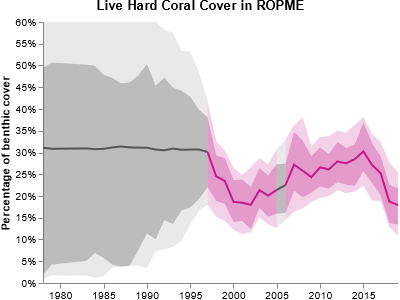

In [5]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Live hard coral cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Live Hard Coral Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "ROPME"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27HCC%27 AND gcrmn_reg = '+'%27'+region_name+'%27'"
    }
  ],
  "data": [
    {
      "name": "lhcc",
      "url": {"signal": "url_param"},
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "formula",
          "as": "upper_95_ceiling",
          "expr": "datum.upper_95>0.6 ? 0.6 : datum.upper_95"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "lhcc", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_lhcc", 
          "data": "lhcc", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "lhcc_mod_a",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1997"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {"name": "series_lhcc", "data": "lhcc", "groupby": "gcrmn_reg"}
      },
      "data": [
        {
          "name": "lhcc_obs_a",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "1997<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=2005"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_lhcc", 
          "data": "lhcc", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "lhcc_mod_b",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "2005<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=2006"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {"name": "series_lhcc", "data": "lhcc", "groupby": "gcrmn_reg"}
      },
      "data": [
        {
          "name": "lhcc_obs_b",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "2006<=year(datum.year)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Type: BAB
Regions where the times series data follow an BAB format (observed, modeled, observed). The difference between specifications were `region_name` and the years of the epochs.  

### [South Asia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAZW4DU8AEFmpg0fjDpTNpBqW9WOo7AiyrZUPKLuz4JptHL9KrckSALTsdCwZCWa38k6tP1gACqYoMYG8NjAhFYdjsVTAynQeHQYG9vssshF4qlMvh3MWF1YhBTYTe73wRBI5Fcmg96lcdHg5kaLe4qFI6EIjEoBT4AEc7AB+QcAXlVAFEDFP-gAVMAAKjAADExQB5CVgbjwGQIlOwRAI1IFBHUR2ofd2RDweAI9DwMAAdW+U7FU7AjV78HHAFICgAdm+f5-gAwCwC1HkABEwAvdQrwROkwHHSFoXecD3lhQt92pdDMMgfUlAAXUWNlU0wHByUNTEoFNfQbzvO1jXNOwOkgQlXn0VirXMJl5mLY1owQ1MzgeJZehpKQi1orJCHUbg+nUHo3gU1xokEi5rV9djumQcw3nLZAsAwgBNd55log0FTwWwZFgYTbSo2T1hcrIej6N5HPjTBNIVH0zUIJSEQATlEBFAkYRMZGqPyLmueTDNTVhUDoUtgrCgA+VI6AANjAEcwBy-KcHLFK0qC8JQtEQjxLxOLXLq9zJK8mxUB85jWQC7jKvUBEAA5Ugi5AotmBqtiuRL9DK1L0qqwbsrygqiqW0rktm3qBtSWrxNxQ5iKIiBSIJVtVhJajNiNLJ6KgK4EHsdo-K6Fr9B0ZknuUTtxj0dZyLTN5GPgYZIF8ZA7GUN49IM6yLjs6gaXiRInumSoYpqfVBKuuj+Uh+7VmGWi2S+kIklJDIVty0iwEJmRGECJJbJVeRqdZOGaRyPIhkOsBjrqK41FJilCZsRhjjedhuAITtOqgPGaTu07HsJux0HYMHV2VI8GfUJnldVsGN2cFXCG1lUMaF1kRbFhjkG8IYnrl3HFZlrpmHx-QAAVwkCMZ4Z3IU1dCRA6ccZwXcc0T9D-HasRIsiMHUABrc6LZsl6oGoBTS3DhSnMa8SQcfZBbl+m6OPCUXYARQHgfLSioBr5nIEzjVCHYbo3ngxC6Ush4YeNOvBbqrGqRxhjb3vbh2Cr3y3NljV1Hp-RfU0NRq4nmWLls9B7McoemogEeC48mlfDsE4CYP+LJtOfQofUAAKGa6HvgBKAAeccAEYQv6gBmGOTU9riQOnVYBR0noJ2TvvB4R9mqeX0OYfSm8hK53YoPced4ERTxngJOekBtjWD2HcOeWRSxGTElfW67FHb6AVg9YGoNwaQ30qcfuB9IAdzuBxZ2d9HZNyYRDBi3BXBVTCngqhWRugFBobwqA3R+FQEEYFDK4VIrRWqOwpqIMopsW4UqFUbwADE8BRBf3YP1TAWi6o6ITBuMo8BmBcN+gYtYOUCjWOPtwbg58tCUMkRxd0XEoDAGWKsEyXwgi-AsCCIEDhQThHeMzd4YocLvCwM-Lu+46TJNMqw9Jb1kCrjaqmJ+60X6sPkGZd4r9kkJPUOkiOeAyl4HKq4qpdACh-hqckwaf5Yk+D8IQ5AjSSnNOfnYER81UhLi-ukDpX9vA1PQoAZAIsJNJaeVOafVBqzPme8OgizlkYSSZCMK-TASDP8IEUZIlxnlMmaIvqYU9kZAOUc1+qz1ljM2RtVRryFlLM+Sc5JEpi6IF2Ok35dAUQ+nNCGQq7wwU739juae4RIhcnslCHASLdhgz9DUuYgCD7gN2uNY0EKw4kMkUo3R7FXHGPYOwXKuU-4AM8ayM+dh7GPicQy+whicA5VEGSvuc8xX1RcnAiSCCoBINnhw7waDuEYIbhPbB08HwSO0YQ-F-ibHkNTGsGVFwriyIYXQxROiwZCPkawnVVDOEWvdvI61yjhFPK2o6q+nCZHcNoW652AjRbMJ6sFQaw1Rpo05QqblArlQ0hMWYixViKUXG5byxxKl9GCrcXQP+sat7eN8SbGltLZZBL0SEsJxlPjGCiX8WJth4lOESck1J9IZDpMyZebJNBcn5KwIU4pdzoX3yqX+cytTIT1NuRge5rTUrtIOV0npkI+kDN8NckZWANkTKmTsmZcy3mHKBV86E+7ynbK2gC9556QVnNEBc2Q27hnztKQer1LyT2AuOWsy9Pzn43p-fss9xzumgvBZCrA0LYWwHhZYRFyKISCjRSvTFuhYA4shBKfFqxlBEpJUA0hUqnVUvCAa7R8bc2JqZSytlHL01CV0Vm-ltGhUrUApKnEEqXKeJlc9OVkBopKyVSq36aqRMapwdq2NBCdjEPzhwo1FZy1OvNQGuRkB6H4xDbalh0NmNSJdTSBRwa6UGf0IyotxpYC2W4InE1io83GNMeYyxPqOGNB8ToMtymAmcWrZAUJbs62RLANEgEcTYnOFOSktJGTylZKQgOyEeTzAFMYCiUdC7x2VOqTO94c691AfKSuzp3SiubsuW+gIu6r1LroI86Zd7wPAoA41rZm1dm-vvRB+L5yt1DPqx+xd5UWvPNEG1j5F6ut-LEdNvr7X8LxbBSwGDcH9IIbhEh3D+lUNChwRi1MWGcN4tUARojpHY5UNs9kNtt9fr2YUk5hNnHIBGOZay9l8weN4n47RUBmx+5YyEzSFu2cnrKulupuNRcS6CbLivSu68mLM3wVJxuLNtGQ7bs45ufbUvVEB33D6FEYHnCR2PdVWDUC7G1RSjiC8l6ywrmvRu+Dt67zapT4eN3ZWnyihfDHtKCE3zeD-f+n9775fMK-YjZPSOmuNCfLywvKOi4CQlJ7nDWFy-UB-b+IUQq5UV+iOewPxUPF5gqKBKd+fefTpABVKCsgw7zp0LHGr6fKDk0zvVSmVeQFUyagXOnTNvF049SzYb7VGfD84zogbOHutDXakTh7qpee0dIyPfCLM2rjyHzaYUo0aJzzYmjLjXP6CMaIBvjfK8F0zQ49jNe6PCsOYW4zSwS1+aoxwoLbxQsrHCw2yLTbAQtti+2yEnbdA9uS0TnJ6Wh0jrK01idhW6mPbG9Cira7qupBfVc99pWx1fta8t2b7xOub+6xG49YHb+QafafurNyL95av1NmbD779L9r1S8lsX8H038kVoNCNYNn54NENlpICUU0NjsIhTtZBsMwBcU8NLtCVX5iUBd-ssRmMHtqUAslV6UOMk1vtGNm8uVWM28c0O9OMRVCCAdSV+MGpBM1dEE4RFVqMJMvcKdMF7xfd-d8FA8w8nVQ9B8C5NNnttNo9GF09DM2Fe9nUtNLUg0GF9Ni9JtvVbMpF-V5DNDU9C8PUoAb1I11FZgDC6UEx3sk1G8m9bDbEeUGCk8XNO8Voe9w8fNS0ZCbFh99BR9wl60fgp8Ys50O1Ete0EJ+1qBB1Mth1ssikH9Upt8p111is99v9P1ys80Okj9ekT9hsd199f9b0b8ADvkgCmtLDn9T1X9Btn1Sjz95tmss9QNGjqjANajH9Ft-8BsoMNtoCts4VdsECUNUUUDMN0DztsCCVCM8Dzdrcr57sKMnsVd3cKCmCqCGNfsXDW8+VGDOhGUu9uNSN-tJUBMudndRM3clEBC-p65pM6cGc01xDFNJDfVpC4cOE5Dk8FC08rN49VDE988tC9NY8M8bM1CXtHNnMzioB68nCaoXC-CB8-jfUgia0wsIkJ8otm1gQoj58Yjl84jidEiGlkics0iKlzBJ1p1d84tcjxtl0CjV0qtiiP8Rsv92i9DeswD-0aif9gCn9BjgUIChtateSGs6S9Cui-0OsRS8i6iQCJTVthiIVRjYDtt4DkMDtpj0VUCsUMCsD8NcD8DaVWD1jHsaEHM3tKD6MfsOUrjSdzgrcyNLpCZuCM4s4TZocBCXJC5AhEcTQady5V4q5sdniAYN4m48d25O4V8aBe50Ryd-pnJHdtEy5AZNUq52AHjmdzRWdIzUdOdvM7IHJecsyr4tjBd1dz5NcccnUddJcTdcoZd9dn434ViQdLd3T9pIFzBoFazYFbjhNXcmcPd0EhDadJ4tVCz5MJCAiWIyxjVVyzUISdNgTi975aCFQPCU9zNtDoSAZOi0S1C88NDXVTDTyi8M8QNLzw9q9Tja9kT3NU0DyM16DjiPCkT3F0T+8-EsSh8q0R9a18TwiYlp9iS99oiu0l8msUtV93gMtqSN8+j0iCtMiisSt2jD8uSN0SiZSyjWToUBSGilS5s6T6iNTH13hpTX1ZTyiHkLz6LADRS1T-kqihj9sRioVdTxiEV9skCjtjTZjsVMDcMLSlirTJEbTiCNjNyWN7CnS69qCDi1Cjjs1-z3yWDLi+MwFOCJyaQpz8EZzVU5zXiFyCyDyFMiFviVN1y1MyDtEASeETDFCdCM99yXCjztMTyoSHzzyvVBpvzjRrzjDbygqY8Qrw1pkIrti1Ldi3MU1PNDjfzdKHCagC0gLfMQK3KwLnhgkQtIKwjG0YLIj4LSTEKktkKUyEi18kjMKuLyoMimTZ0ciCKOTKssiatmKyL+Ss9BTujhTei2qFsj16KpSWjSK2j5T2LeLlSJrVT+i-9lrNT+LtTBLyk4CJiDSxL0MTtTT5jZLrtrTLilK7TQKW8di3yvDPtNKmMXysr28HrmC6ALi7sjLyVpVTKAYQgxN+DYdJNrK8zZMlyA8viVKS8KFbrWQPKU9vKzy74HV-LtzYqlCQTPDDEXD4THTUq69PyMq1CMTCr6ysgcSyq8SKrJ8qqZ8SSEs6rYju40s0L18Ujcs1rsKGSd8uqWSerE1CiiL3gBqz9RtyKKjRrqK78VS2SKpxTNqGKmKJa+TFrv1QCxqVr2inyZq1soDdqmt9qRLEDDtjqTSztpKLtFiLqFKrrSMSDKMA0HTET3ynr9jXTfrVj9puYDo5ggA)
Specification also includes upper bound clipping for drawing. This region is the only member of this group.

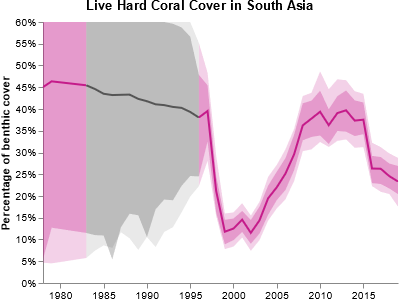

In [6]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Live hard coral cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Live Hard Coral Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "South Asia"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27HCC%27 AND gcrmn_reg = '+'%27'+region_name+'%27'"
    }
  ],
  "data": [
    {
      "name": "lhcc",
      "url": {"signal": "url_param"},
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "formula",
          "as": "upper_95_ceiling",
          "expr": "datum.upper_95>0.6 ? 0.6 : datum.upper_95"
        },
        {
          "type": "formula",
          "as": "upper_80_ceiling",
          "expr": "datum.upper_80>0.6 ? 0.6 : datum.upper_80"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "lhcc", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {"name": "series_lhcc", "data": "lhcc", "groupby": "gcrmn_reg"}
      },
      "data": [
        {
          "name": "lhcc_obs_a",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1983"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80_ceiling"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_lhcc", 
          "data": "lhcc", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "lhcc_mod_a",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "1983<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1996"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {"name": "series_lhcc", "data": "lhcc", "groupby": "gcrmn_reg"}
      },
      "data": [
        {
          "name": "lhcc_obs_b",
          "source": "series_lhcc",
          "transform": [
            {
              "type": "filter", 
              "expr": "1996<=year(datum.year)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "lhcc_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "lhcc_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "lhcc_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Live Hard Coral Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)